In [92]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.options.display.float_format = '{:.5f}'.format
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'

# 지역별+연령별 비교

In [93]:
credit_card_dataset_city_total = pd.read_csv("./dataset/credit_card_dataset_city_total.csv", encoding='utf-8')
credit_card_dataset_city_total

,pop_cd,year,month,avg_score,avg_rat,new_avg_rat,city,ages,monthly_spend_rat,population,...,total_loan_commitment,total_inst_rep_loanb,total_ls_rep_loanb,total_credit_loan,total_mortgage_loan,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend,date
0,L012,2016,1,740,4,5,서울,20대,3,1039000,...,3948200000000,10930280000000,10130250000000,15501880000000,36832550000000,263906000000,86237000000,491447000000,755353000000,2016-01-01
1,L012,2016,2,782,4,5,서울,20대,3,1678000,...,9094760000000,20505160000000,20538720000000,31999460000000,71180760000000,466484000000,139274000000,719862000000,1186346000000,2016-02-01
2,L012,2016,3,782,4,5,서울,20대,3,1679000,...,8982650000000,20618120000000,20769230000000,32220010000000,71323920000000,448293000000,130962000000,747155000000,1195448000000,2016-03-01
3,L012,2016,4,782,4,5,서울,20대,3,1685000,...,9065300000000,20759200000000,21399500000000,32621600000000,72421300000000,492020000000,149965000000,807115000000,1299135000000,2016-04-01
4,L012,2016,5,781,4,5,서울,20대,3,1682000,...,9133260000000,20890440000000,21647340000000,32933560000000,72948340000000,479370000000,137924000000,761946000000,1241316000000,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,L168,2017,8,804,3,3,제주,80대,5,14000,...,186340000000,106820000000,713020000000,279300000000,1529780000000,1148000000,406000000,826000000,1974000000,2017-08-01
2684,L168,2017,9,802,3,3,제주,80대,5,15000,...,197400000000,114600000000,776100000000,304500000000,1653150000000,1110000000,345000000,645000000,1755000000,2017-09-01
2685,L168,2017,10,802,3,3,제주,80대,5,15000,...,217500000000,114450000000,782850000000,308700000000,1687650000000,1230000000,555000000,765000000,1995000000,2017-10-01
2686,L168,2017,11,802,3,3,제주,80대,5,15000,...,220050000000,120300000000,787950000000,307650000000,1705350000000,1110000000,420000000,870000000,1980000000,2017-11-01


In [94]:
df_city_total = credit_card_dataset_city_total[['date','city','ages','population','total_monthly_card_spend','total_credit_card_payment','total_credit_card_installments_payment','total_debit_card_payment','total_monthly_spend']] 
df_city_total

,date,city,ages,population,total_monthly_card_spend,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
0,2016-01-01,서울,20대,1039000,841590000000,263906000000,86237000000,491447000000,755353000000
1,2016-02-01,서울,20대,1678000,1325620000000,466484000000,139274000000,719862000000,1186346000000
2,2016-03-01,서울,20대,1679000,1326410000000,448293000000,130962000000,747155000000,1195448000000
3,2016-04-01,서울,20대,1685000,1449100000000,492020000000,149965000000,807115000000,1299135000000
4,2016-05-01,서울,20대,1682000,1379240000000,479370000000,137924000000,761946000000,1241316000000
...,...,...,...,...,...,...,...,...,...
2683,2017-08-01,제주,80대,14000,2380000000,1148000000,406000000,826000000,1974000000
2684,2017-09-01,제주,80대,15000,2100000000,1110000000,345000000,645000000,1755000000
2685,2017-10-01,제주,80대,15000,2550000000,1230000000,555000000,765000000,1995000000
2686,2017-11-01,제주,80대,15000,2400000000,1110000000,420000000,870000000,1980000000


In [95]:
#지역별 비교
city_credit_card_spend = df_city_total.groupby('city').sum()[['population','total_monthly_card_spend','total_credit_card_payment','total_credit_card_installments_payment','total_debit_card_payment','total_monthly_spend']]
city_credit_card_spend = city_credit_card_spend.divide(city_credit_card_spend.groupby('city')['population'].sum(), axis='index')
city_credit_card_spend

,population,total_monthly_card_spend,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
city,,,,,,
강원,1.00000,1205286.00092,602907.98691,214621.17639,387756.83762,990664.82453
경기,1.00000,1392829.38125,764756.22541,228538.02524,399535.13061,1164291.35602
경남,1.00000,1191192.36328,607625.17685,220048.64988,363518.53655,971143.71339
경북,1.00000,1057745.00029,547792.46574,183068.63723,326883.89733,874676.36307
광주,1.00000,1319298.57528,714400.79948,234106.28993,370791.48587,1085192.28535
대구,1.00000,1182257.00263,647135.58375,218432.38768,316689.03120,963824.61495
대전,1.00000,1324672.71126,719777.79590,223455.23629,381439.67907,1101217.47497
부산,1.00000,1249456.69593,643415.37022,249773.65876,356267.66696,999683.03717
서울,1.00000,1407112.66730,793909.87326,226868.40680,386334.38724,1180244.26050


In [96]:
# 인구수를 곱하고 다시 나눠주기
# city_credit_card_spend = city_credit_card_spend.groupby('city').sum().divide(city_credit_card_spend.groupby('city_ages')['population'].sum(), axis='index')
# city_credit_card_spend.drop(['year', 'month', 'avg_score', 'avg_rat', 'population'], axis=1, inplace=True)

In [97]:
city_credit_card_spend.reset_index(inplace=True) #오름차순 정렬
city_credit_card_spend

,city,population,total_monthly_card_spend,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
0,강원,1.00000,1205286.00092,602907.98691,214621.17639,387756.83762,990664.82453
1,경기,1.00000,1392829.38125,764756.22541,228538.02524,399535.13061,1164291.35602
2,경남,1.00000,1191192.36328,607625.17685,220048.64988,363518.53655,971143.71339
3,경북,1.00000,1057745.00029,547792.46574,183068.63723,326883.89733,874676.36307
4,광주,1.00000,1319298.57528,714400.79948,234106.28993,370791.48587,1085192.28535
5,대구,1.00000,1182257.00263,647135.58375,218432.38768,316689.03120,963824.61495
6,대전,1.00000,1324672.71126,719777.79590,223455.23629,381439.67907,1101217.47497
7,부산,1.00000,1249456.69593,643415.37022,249773.65876,356267.66696,999683.03717
8,서울,1.00000,1407112.66730,793909.87326,226868.40680,386334.38724,1180244.26050
9,울산,1.00000,1320828.54447,706246.11888,220833.64783,393748.77777,1099994.89665


In [98]:
city_credit_card_spend.sort_values('total_monthly_card_spend',ascending= True, inplace=True)
city_credit_card_spend

,city,population,total_monthly_card_spend,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
11,전남,1.00000,1040556.20815,520300.62845,185112.56314,335143.01656,855443.64501
3,경북,1.00000,1057745.00029,547792.46574,183068.63723,326883.89733,874676.36307
12,전북,1.00000,1128372.46685,598252.54033,199124.77754,330995.14898,929247.68930
15,충북,1.00000,1173755.99772,604242.42526,193357.58145,376155.99101,980398.41627
14,충남,1.00000,1177463.95838,617879.14293,192074.68417,367510.13129,985389.27421
5,대구,1.00000,1182257.00263,647135.58375,218432.38768,316689.03120,963824.61495
2,경남,1.00000,1191192.36328,607625.17685,220048.64988,363518.53655,971143.71339
0,강원,1.00000,1205286.00092,602907.98691,214621.17639,387756.83762,990664.82453
7,부산,1.00000,1249456.69593,643415.37022,249773.65876,356267.66696,999683.03717
10,인천,1.00000,1299312.42298,671934.24718,227661.24213,399716.93367,1071651.18085


In [99]:
city_credit_card_spend.reset_index(inplace=True) #오름차순 정렬
city_credit_card_spend

,index,city,population,total_monthly_card_spend,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
0,11,전남,1.00000,1040556.20815,520300.62845,185112.56314,335143.01656,855443.64501
1,3,경북,1.00000,1057745.00029,547792.46574,183068.63723,326883.89733,874676.36307
2,12,전북,1.00000,1128372.46685,598252.54033,199124.77754,330995.14898,929247.68930
3,15,충북,1.00000,1173755.99772,604242.42526,193357.58145,376155.99101,980398.41627
4,14,충남,1.00000,1177463.95838,617879.14293,192074.68417,367510.13129,985389.27421
5,5,대구,1.00000,1182257.00263,647135.58375,218432.38768,316689.03120,963824.61495
6,2,경남,1.00000,1191192.36328,607625.17685,220048.64988,363518.53655,971143.71339
7,0,강원,1.00000,1205286.00092,602907.98691,214621.17639,387756.83762,990664.82453
8,7,부산,1.00000,1249456.69593,643415.37022,249773.65876,356267.66696,999683.03717
9,10,인천,1.00000,1299312.42298,671934.24718,227661.24213,399716.93367,1071651.18085


<AxesSubplot:xlabel='city', ylabel='total_monthly_card_spend'>

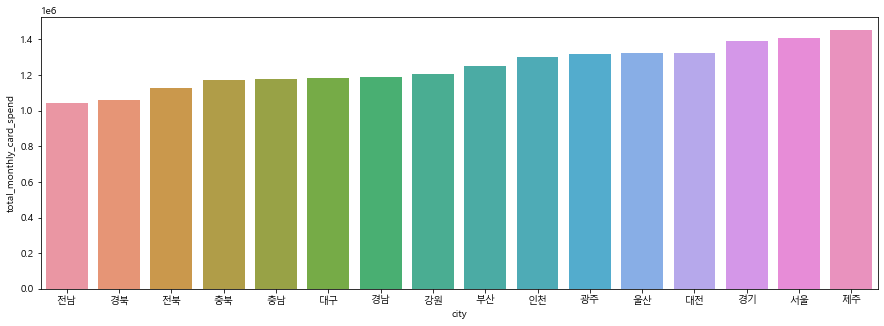

In [100]:
#지역별 전체 카드 소비 금액(신용+체크)
plt.figure(figsize=(15,5))
sns.barplot(data=city_credit_card_spend, x="city", y ='total_monthly_card_spend')

<AxesSubplot:xlabel='city', ylabel='total_credit_card_payment'>

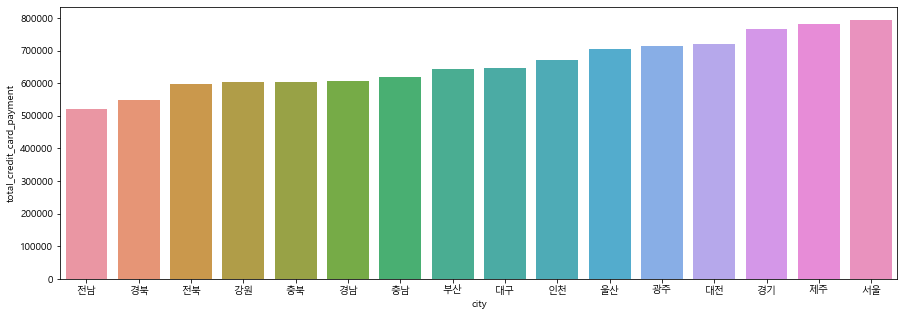

In [101]:
#지역별 전체 신용카드 사용금액
city_credit_card_spend.sort_values('total_credit_card_payment',ascending= True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_credit_card_spend, x="city", y ='total_credit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_debit_card_payment'>

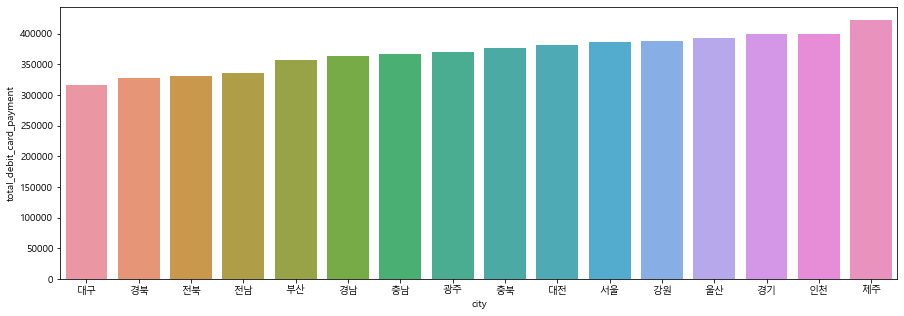

In [102]:
#지역별 전체 체크카드 사용금액
city_credit_card_spend.sort_values('total_debit_card_payment',ascending= True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_credit_card_spend, x="city", y ='total_debit_card_payment')


-----------------------------

-------------

# 지역별 신용카드 체크카드 

In [103]:
df2 = city_credit_card_spend[["city","total_credit_card_payment",'total_debit_card_payment']]
df2

,city,total_credit_card_payment,total_debit_card_payment
5,대구,647135.58375,316689.03120
1,경북,547792.46574,326883.89733
2,전북,598252.54033,330995.14898
0,전남,520300.62845,335143.01656
8,부산,643415.37022,356267.66696
6,경남,607625.17685,363518.53655
4,충남,617879.14293,367510.13129
10,광주,714400.79948,370791.48587
3,충북,604242.42526,376155.99101
12,대전,719777.79590,381439.67907


In [104]:
credit_card = city_credit_card_spend['total_credit_card_payment']
debt_card = city_credit_card_spend['total_debit_card_payment']
city =  city_credit_card_spend['city']

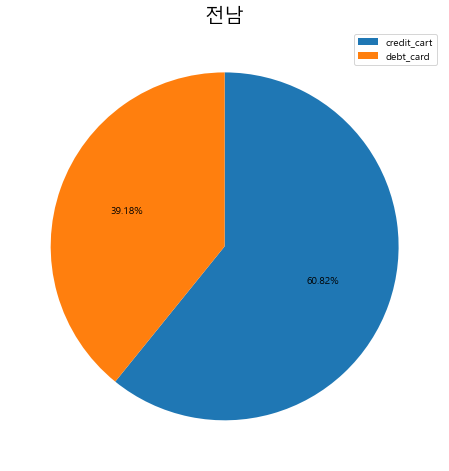

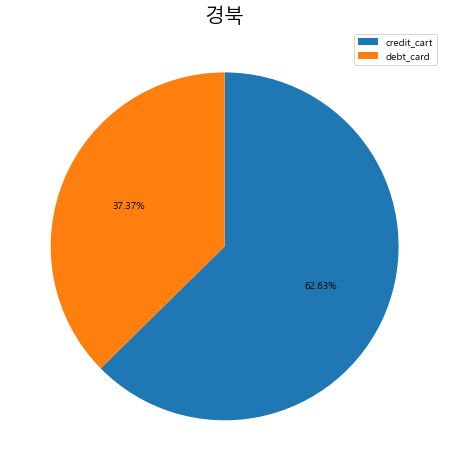

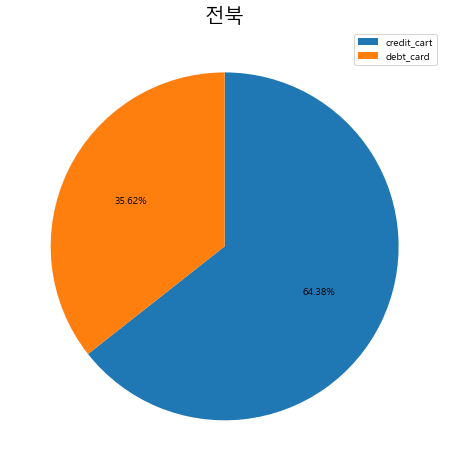

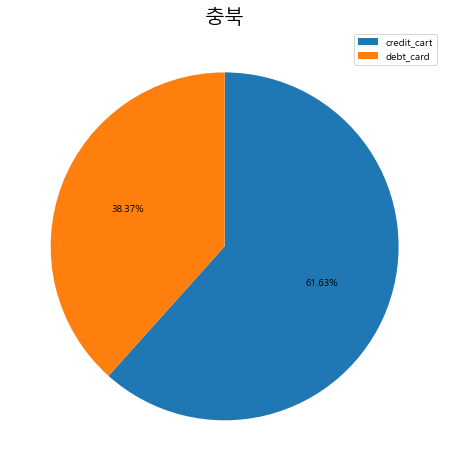

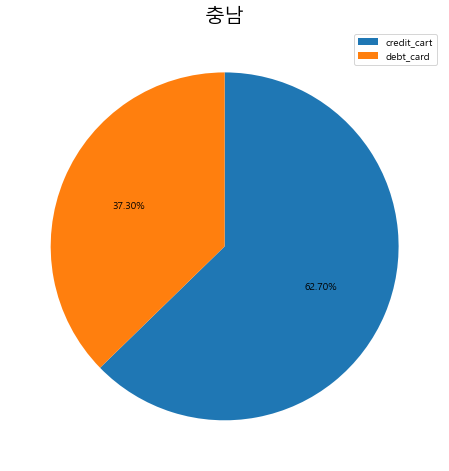

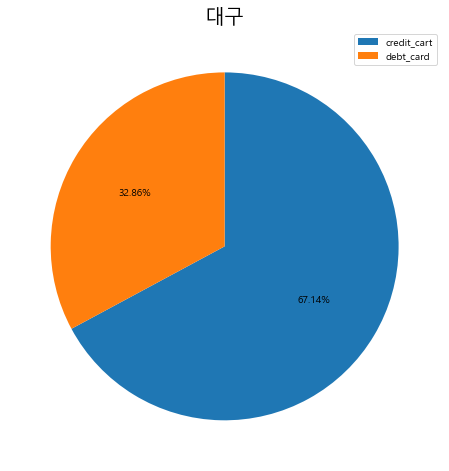

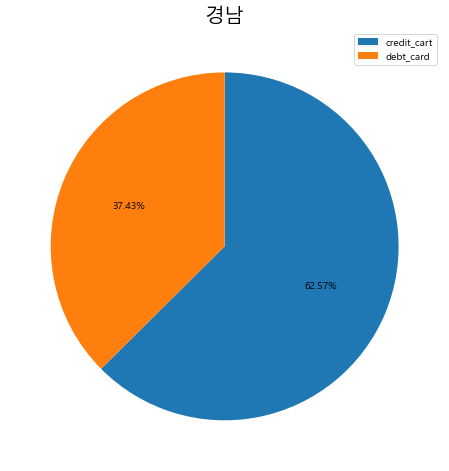

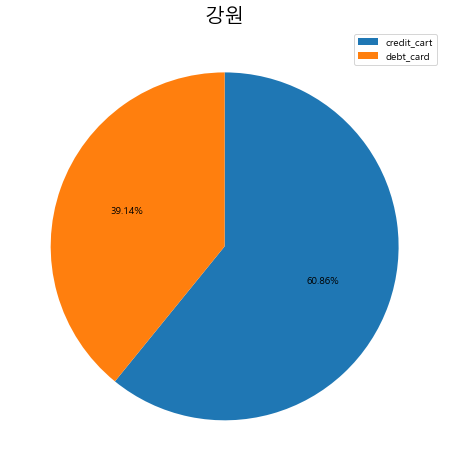

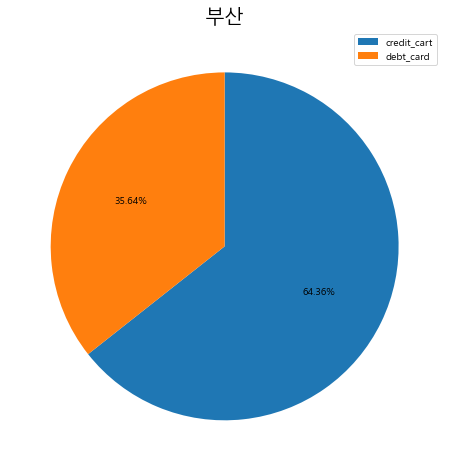

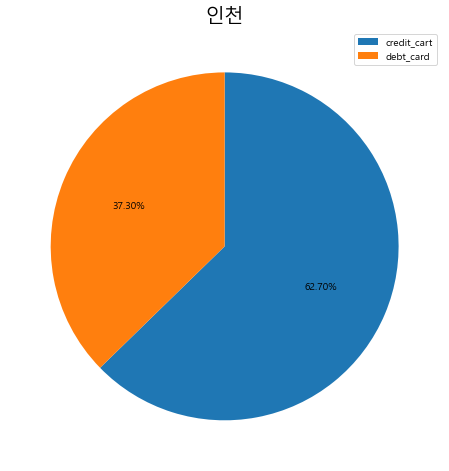

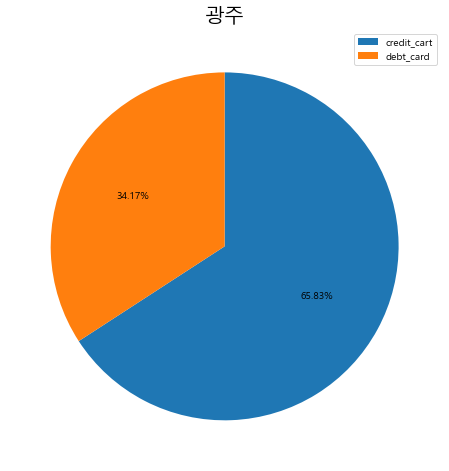

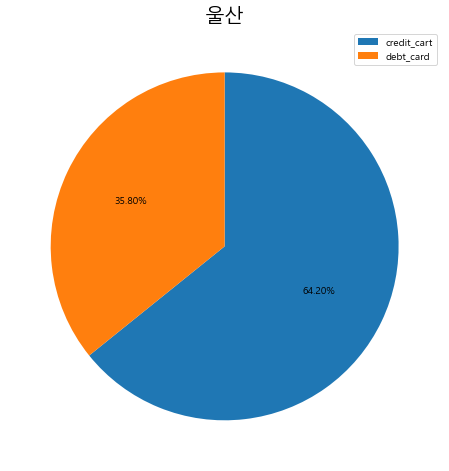

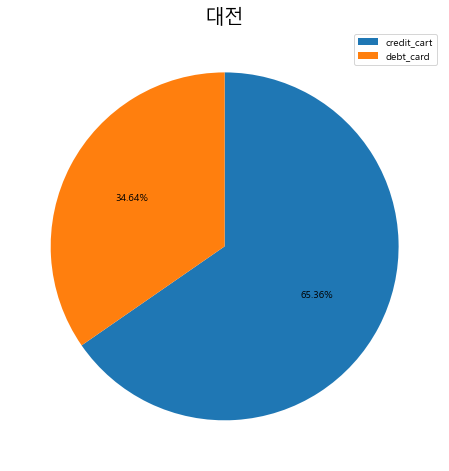

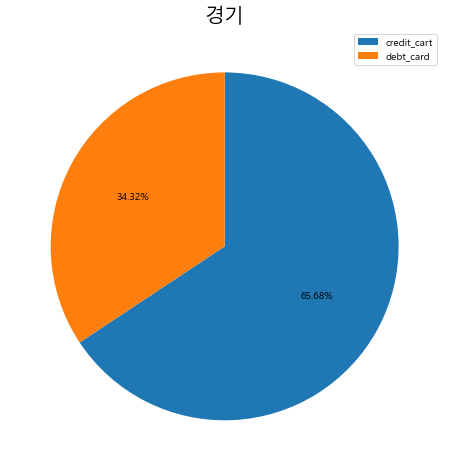

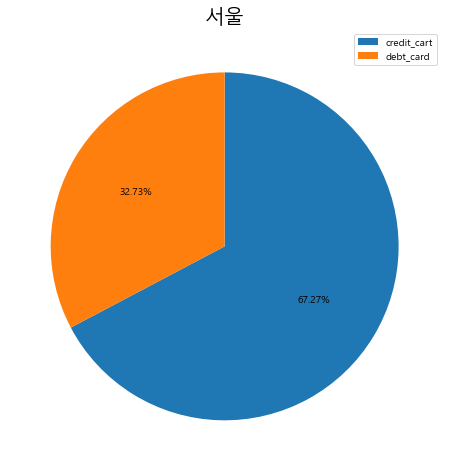

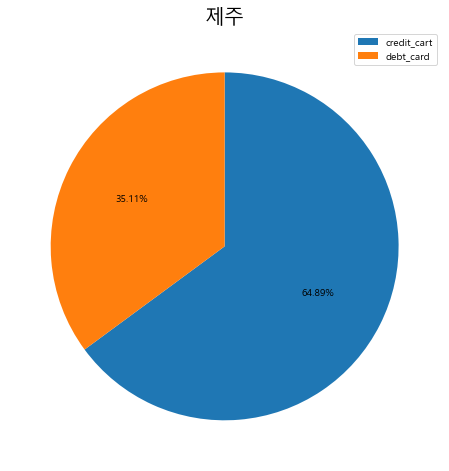

KeyError: 16

In [177]:
labels = ["credit_cart","debt_card"]
for i in range(0,17,1):
        
        frequency = [credit_card[i] ,debt_card[i]]
        fig = plt.figure(figsize=(8,8)) 
        fig.set_facecolor('white')
        ax = fig.add_subplot() ## 프레임 생성
        
        pie = ax.pie(frequency, ## 파이차트 출력
            startangle=90, ## 시작점을 90도(degree)로 지정
            counterclock=False, ## 시계 방향으로 그린다.
            autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
            )
        plt.legend(pie[0],labels)
        plt.title(city[i],fontsize= 20)     
        plt.show()

--------------

--------------------------------

--------------

## 연령별로 그룹화/ 신용+체크카드 사용량

In [106]:
city_age_card_spend = df_city_total.groupby(['ages','city']).sum()[['population','total_monthly_card_spend','total_credit_card_payment','total_credit_card_installments_payment','total_debit_card_payment','total_monthly_spend']]
city_age_card_spend = city_age_card_spend.divide(city_age_card_spend.groupby(['ages','city'])['population'].sum(), axis='index')
city_age_card_spend


population  total_monthly_card_spend  total_credit_card_payment  \
ages city                                                                    
20대  강원       1.00000              800765.83894               240623.81063   
     경기       1.00000              832124.22417               287185.25983   
     경남       1.00000              728607.99239               231032.92103   
     경북       1.00000              733378.59723               228841.41024   
     광주       1.00000              774918.53178               253233.84064   
...               ...                       ...                        ...   
80대  전남       1.00000               74968.37263                26603.22024   
     전북       1.00000              134812.23922                53471.48818   
     제주       1.00000              193804.03458                95481.26801   
     충남       1.00000              108812.38155                44794.06191   
     충북       1.00000              138191.96429                54766.74107   

           total_credit_card_installments_payment  total_debit_card_payment  \
ages city                                                                     
20대  강원                               84106.05709              476035.97122   
     경기                               86398.30062              458540.66372   
     경남                               80034.44339              417540.62797   
     경북                               74986.17167              429551.01532   
     광주                               84011.10116              437673.58997   
...                                           ...                       ...   
80대  전남                               11194.93962               37170.21277   
     전북                               21748.95688               59591.79416   
     제주                               34541.78674               63780.97983   
     충남                               15624.76311               48393.55654   
     충북                               22989.95536               60435.26786   

           total_monthly_spend  
ages city                       
20대  강원           716659.78185  
     경기           745725.92355  
     경남           648573.54900  
     경북           658392.42556  
     광주           690907.43062  
...                        ...  
80대  전남            63773.43301  
     전북           113063.28234  
     제주           159262.24784  
     충남            93187.61845  
     충북           115202.00893  

[112 rows x 6 columns]

In [107]:
city_age_card_spend.reset_index(inplace=True)
city_age_card_spend

,ages,city,population,total_monthly_card_spend,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
0,20대,강원,1.00000,800765.83894,240623.81063,84106.05709,476035.97122,716659.78185
1,20대,경기,1.00000,832124.22417,287185.25983,86398.30062,458540.66372,745725.92355
2,20대,경남,1.00000,728607.99239,231032.92103,80034.44339,417540.62797,648573.54900
3,20대,경북,1.00000,733378.59723,228841.41024,74986.17167,429551.01532,658392.42556
4,20대,광주,1.00000,774918.53178,253233.84064,84011.10116,437673.58997,690907.43062
...,...,...,...,...,...,...,...,...
107,80대,전남,1.00000,74968.37263,26603.22024,11194.93962,37170.21277,63773.43301
108,80대,전북,1.00000,134812.23922,53471.48818,21748.95688,59591.79416,113063.28234
109,80대,제주,1.00000,193804.03458,95481.26801,34541.78674,63780.97983,159262.24784
110,80대,충남,1.00000,108812.38155,44794.06191,15624.76311,48393.55654,93187.61845


<AxesSubplot:xlabel='city', ylabel='total_monthly_card_spend'>

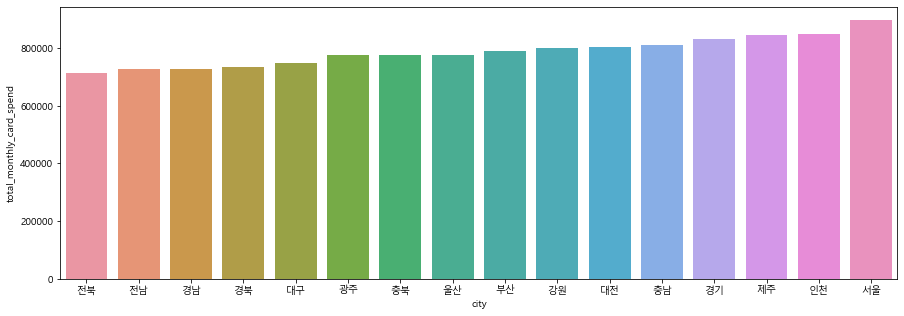

In [108]:
city_age_card_spend_20= city_age_card_spend[city_age_card_spend['ages'] == '20대']
city_age_card_spend_20.sort_values('total_monthly_card_spend', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_20, x='city',y ='total_monthly_card_spend')

<AxesSubplot:xlabel='city', ylabel='total_monthly_card_spend'>

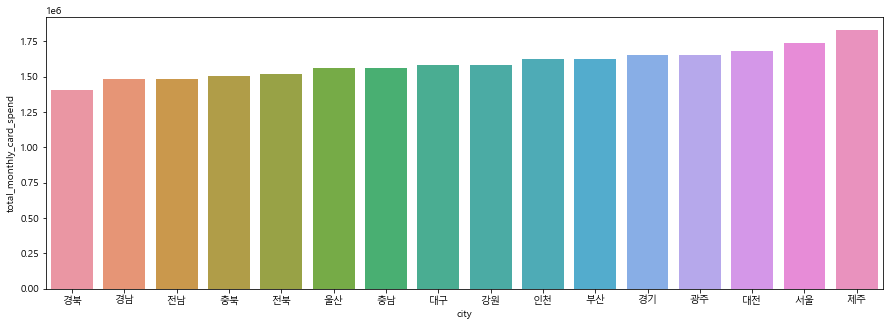

In [109]:
city_age_card_spend_30= city_age_card_spend[city_age_card_spend['ages'] == '30대']
city_age_card_spend_30.sort_values('total_monthly_card_spend', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_30, x='city',y ='total_monthly_card_spend')

<AxesSubplot:xlabel='city', ylabel='total_monthly_card_spend'>

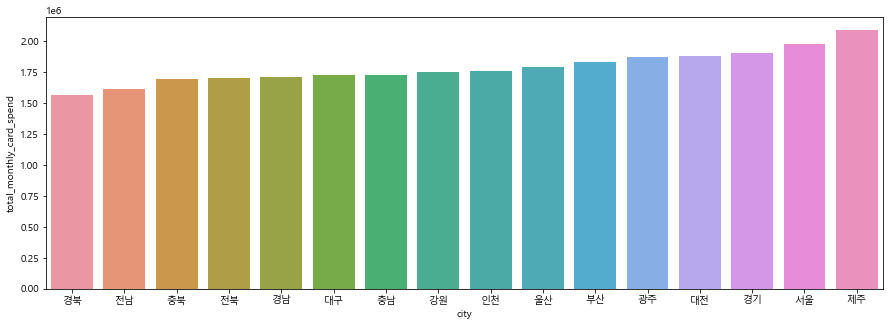

In [110]:
city_age_card_spend_40= city_age_card_spend[city_age_card_spend['ages'] == '40대']
city_age_card_spend_40.sort_values('total_monthly_card_spend', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_40, x='city',y ='total_monthly_card_spend')

<AxesSubplot:xlabel='city', ylabel='total_monthly_card_spend'>

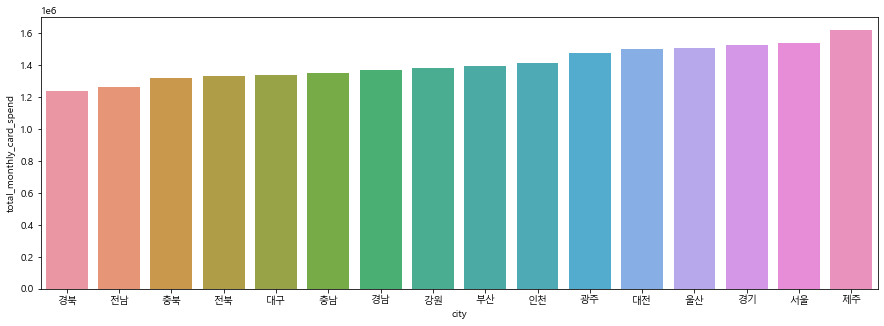

In [111]:
city_age_card_spend_50= city_age_card_spend[city_age_card_spend['ages'] == '50대']
city_age_card_spend_50.sort_values('total_monthly_card_spend', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_50, x='city',y ='total_monthly_card_spend')

<AxesSubplot:xlabel='city', ylabel='total_monthly_card_spend'>

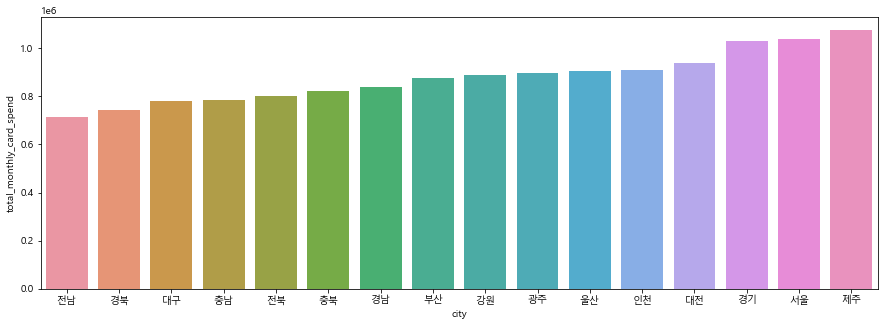

In [112]:
city_age_card_spend_60= city_age_card_spend[city_age_card_spend['ages'] == '60대']
city_age_card_spend_60.sort_values('total_monthly_card_spend', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_60, x='city',y ='total_monthly_card_spend')

<AxesSubplot:xlabel='city', ylabel='total_monthly_card_spend'>

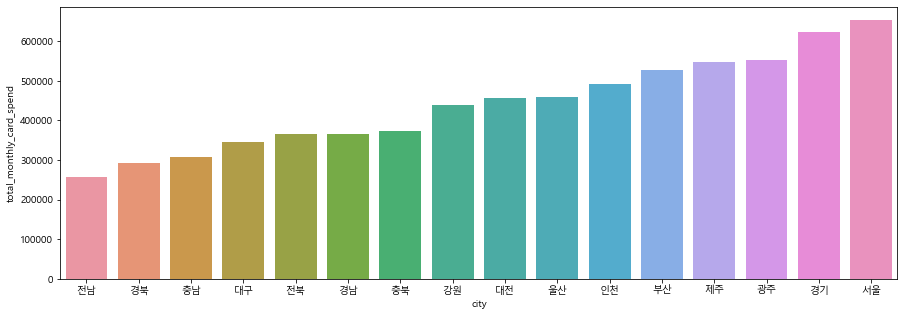

In [113]:
city_age_card_spend_70= city_age_card_spend[city_age_card_spend['ages'] == '70대']
city_age_card_spend_70.sort_values('total_monthly_card_spend', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_70, x='city',y ='total_monthly_card_spend')

<AxesSubplot:xlabel='city', ylabel='total_monthly_card_spend'>

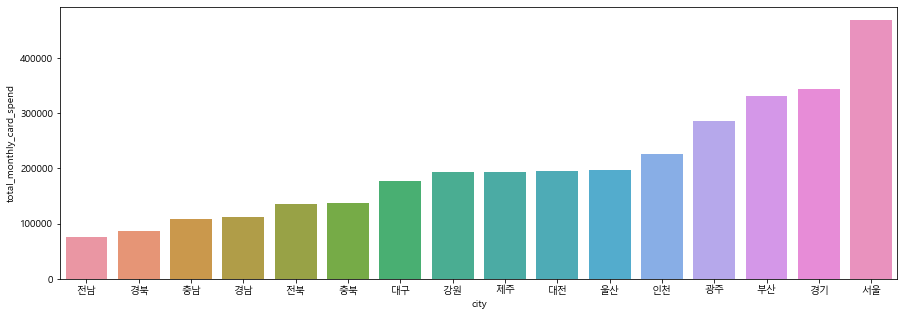

In [114]:
city_age_card_spend_80= city_age_card_spend[city_age_card_spend['ages'] == '80대']
city_age_card_spend_80.sort_values('total_monthly_card_spend', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_80, x='city',y ='total_monthly_card_spend')

## 연령별로 그룹화/ 신용카드 사용량

<AxesSubplot:xlabel='city', ylabel='total_credit_card_payment'>

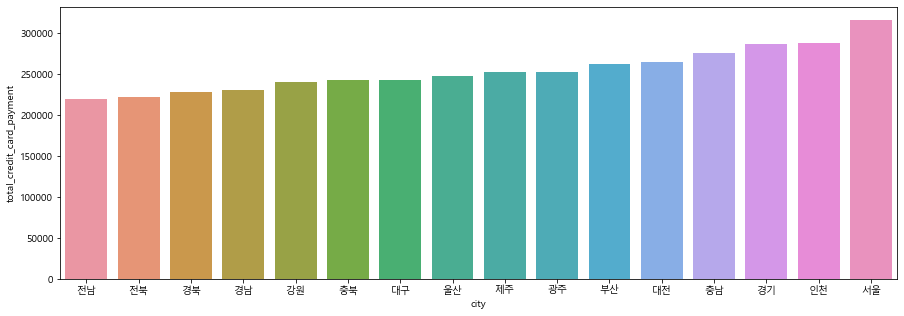

In [115]:
#20대
city_age_card_spend_20= city_age_card_spend[city_age_card_spend['ages'] == '20대']
city_age_card_spend_20.sort_values('total_credit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_20, x='city',y ='total_credit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_credit_card_payment'>

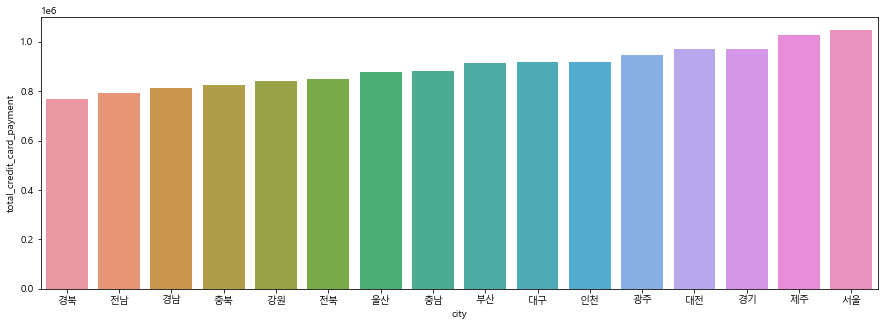

In [116]:
#30대
city_age_card_spend_30= city_age_card_spend[city_age_card_spend['ages'] == '30대']
city_age_card_spend_30.sort_values('total_credit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_30, x='city',y ='total_credit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_credit_card_payment'>

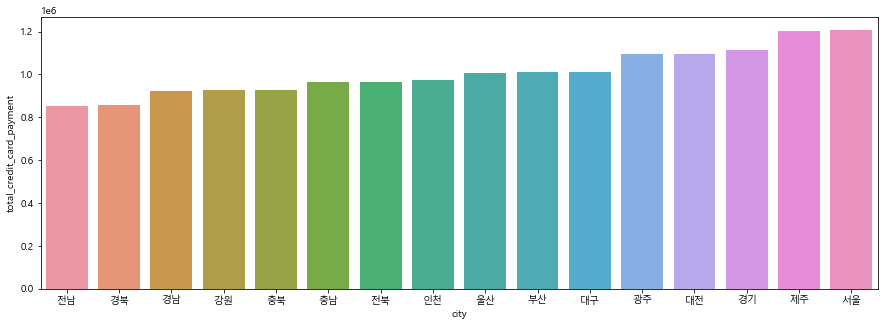

In [117]:
#40대
city_age_card_spend_40= city_age_card_spend[city_age_card_spend['ages'] == '40대']
city_age_card_spend_40.sort_values('total_credit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_40, x='city',y ='total_credit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_credit_card_payment'>

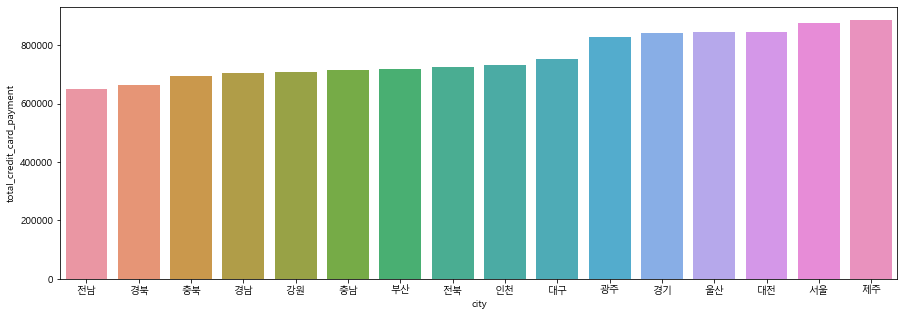

In [118]:
#50대
city_age_card_spend_50= city_age_card_spend[city_age_card_spend['ages'] == '50대']
city_age_card_spend_50.sort_values('total_credit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_50, x='city',y ='total_credit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_credit_card_payment'>

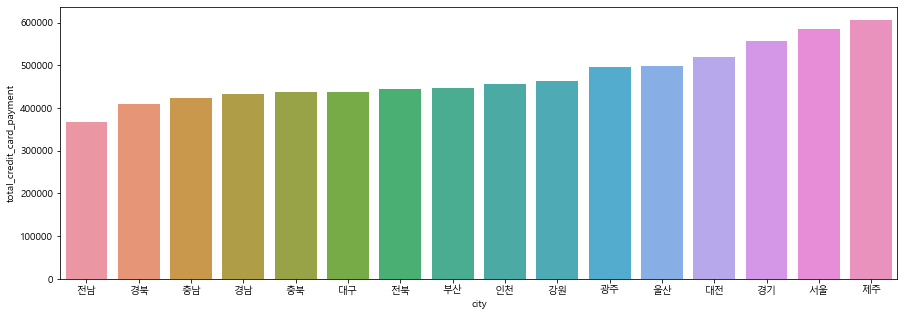

In [119]:
#60대
city_age_card_spend_60= city_age_card_spend[city_age_card_spend['ages'] == '60대']
city_age_card_spend_60.sort_values('total_credit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_60, x='city',y ='total_credit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_credit_card_payment'>

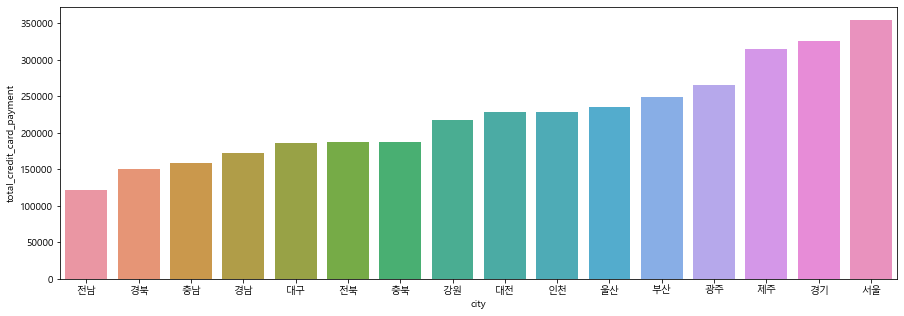

In [120]:
#70대
city_age_card_spend_70= city_age_card_spend[city_age_card_spend['ages'] == '70대']
city_age_card_spend_70.sort_values('total_credit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_70, x='city',y ='total_credit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_credit_card_payment'>

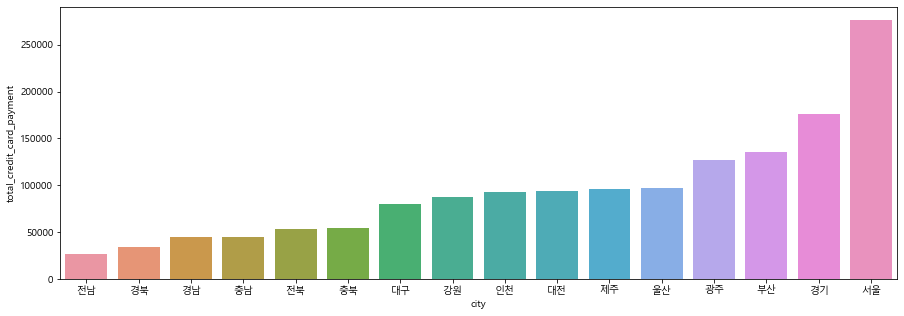

In [121]:
#80대
city_age_card_spend_80= city_age_card_spend[city_age_card_spend['ages'] == '80대']
city_age_card_spend_80.sort_values('total_credit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_80, x='city',y ='total_credit_card_payment')

## 연령별로 그룹화/ 체크카드 전체 소비량

<AxesSubplot:xlabel='city', ylabel='total_debit_card_payment'>

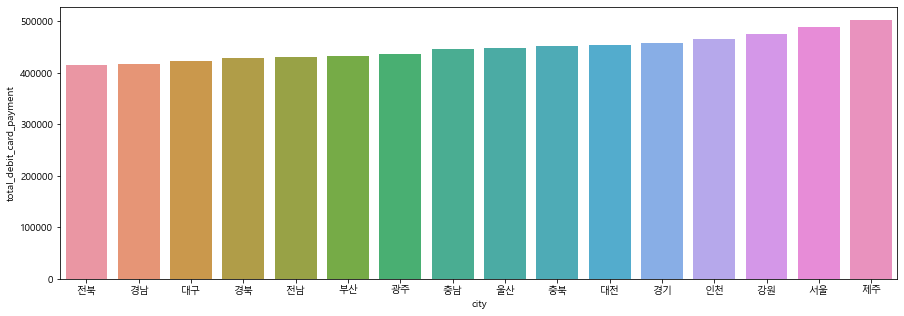

In [122]:
#20대
city_age_card_spend_20= city_age_card_spend[city_age_card_spend['ages'] == '20대']
city_age_card_spend_20.sort_values('total_debit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_20, x='city',y ='total_debit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_debit_card_payment'>

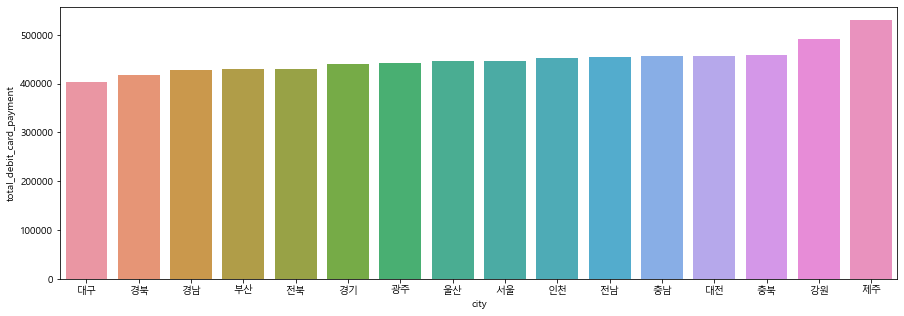

In [123]:
#30대
city_age_card_spend_30= city_age_card_spend[city_age_card_spend['ages'] == '30대']
city_age_card_spend_30.sort_values('total_debit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_30, x='city',y ='total_debit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_debit_card_payment'>

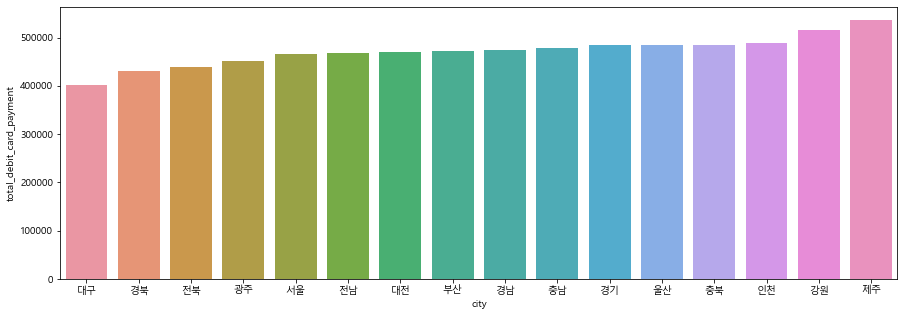

In [124]:
#40대
city_age_card_spend_40= city_age_card_spend[city_age_card_spend['ages'] == '40대']
city_age_card_spend_40.sort_values('total_debit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_40, x='city',y ='total_debit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_debit_card_payment'>

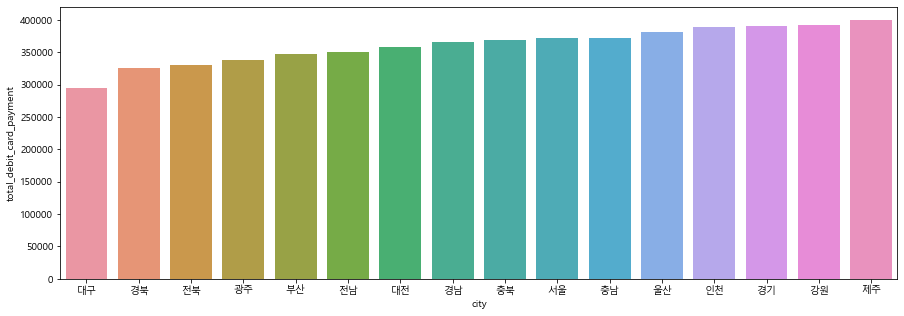

In [125]:
#50대
city_age_card_spend_50= city_age_card_spend[city_age_card_spend['ages'] == '50대']
city_age_card_spend_50.sort_values('total_debit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_50, x='city',y ='total_debit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_debit_card_payment'>

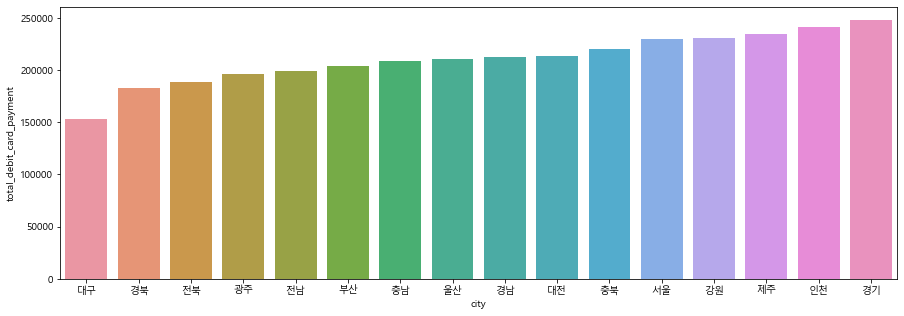

In [126]:
#60대
city_age_card_spend_60= city_age_card_spend[city_age_card_spend['ages'] == '60대']
city_age_card_spend_60.sort_values('total_debit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_60, x='city',y ='total_debit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_debit_card_payment'>

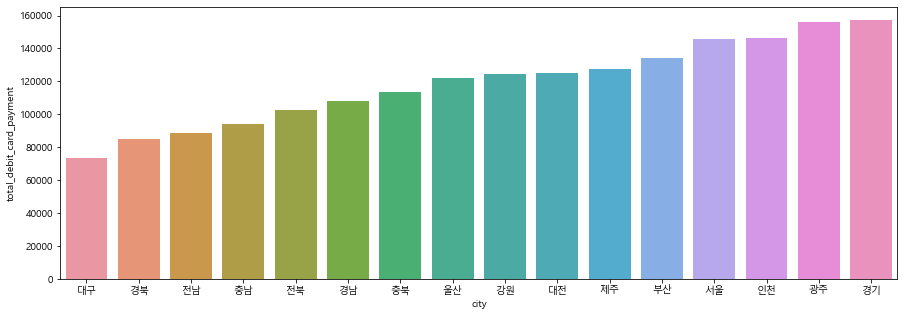

In [127]:
#70대
city_age_card_spend_70= city_age_card_spend[city_age_card_spend['ages'] == '70대']
city_age_card_spend_70.sort_values('total_debit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_70, x='city',y ='total_debit_card_payment')

<AxesSubplot:xlabel='city', ylabel='total_debit_card_payment'>

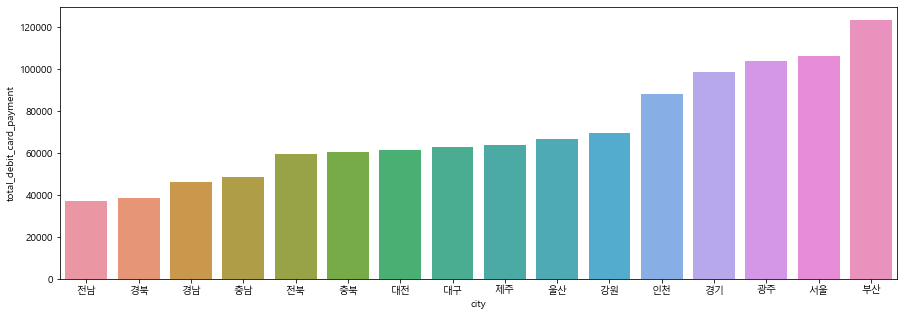

In [128]:
#80대
city_age_card_spend_80= city_age_card_spend[city_age_card_spend['ages'] == '80대']
city_age_card_spend_80.sort_values('total_debit_card_payment', ascending=True, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=city_age_card_spend_80, x='city',y ='total_debit_card_payment')

# 성별로 비교

In [129]:
credit_card_dataset_sex_total = pd.read_csv("./dataset/credit_card_dataset_sex_total.csv", encoding='utf-8')
credit_card_dataset_sex_total

,pop_cd,year,month,avg_score,avg_rat,new_avg_rat,sex,ages,monthly_spend_rat,population,...,total_loan_commitment,total_inst_rep_loanb,total_ls_rep_loanb,total_credit_loan,total_mortgage_loan,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend,date
0,Y20,2016,1,733,4,5,남자,20대,4,3815000,...,10796450000000,45207750000000,34182400000000,52990350000000,118646500000000,503580000000,141155000000,1377215000000,1880795000000,2016-01-01
1,Y20,2016,2,766,4,5,남자,20대,4,4015000,...,16019850000000,56250150000000,46052050000000,69298900000000,152730600000000,839135000000,220825000000,1509640000000,2348775000000,2016-02-01
2,Y20,2016,3,766,4,5,남자,20대,4,4009000,...,15915730000000,56045820000000,46344040000000,69596240000000,152221730000000,813827000000,204459000000,1547474000000,2361301000000,2016-03-01
3,Y20,2016,4,766,4,5,남자,20대,4,4020000,...,15999600000000,56360400000000,47596800000000,70350000000000,154046400000000,900480000000,241200000000,1672320000000,2572800000000,2016-04-01
4,Y20,2016,5,765,4,5,남자,20대,4,4031000,...,16204620000000,56877410000000,48573550000000,71469630000000,156080320000000,878758000000,221705000000,1559997000000,2438755000000,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Y85,2017,8,818,3,2,여자,80대,5,918000,...,7894800000000,17175780000000,38537640000000,12980520000000,77359860000000,75276000000,39474000000,68850000000,144126000000,2017-08-01
332,Y85,2017,9,818,3,2,여자,80대,5,926000,...,7917300000000,17362500000000,38771620000000,13176980000000,77895120000000,75932000000,36114000000,63894000000,139826000000,2017-09-01
333,Y85,2017,10,818,3,2,여자,80대,5,934000,...,8060420000000,17521840000000,39013180000000,13309500000000,78642800000000,81258000000,45766000000,69116000000,150374000000,2017-10-01
334,Y85,2017,11,819,3,2,여자,80대,5,943000,...,8081510000000,17624670000000,39728590000000,13513190000000,79579770000000,75440000000,41492000000,71668000000,147108000000,2017-11-01


In [130]:
df_sex_total= credit_card_dataset_sex_total[['date','sex','ages','population','total_monthly_card_spend','total_credit_card_payment','total_credit_card_installments_payment','total_debit_card_payment','total_monthly_spend']]
credit_card_dataset_sex_total

,pop_cd,year,month,avg_score,avg_rat,new_avg_rat,sex,ages,monthly_spend_rat,population,...,total_loan_commitment,total_inst_rep_loanb,total_ls_rep_loanb,total_credit_loan,total_mortgage_loan,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend,date
0,Y20,2016,1,733,4,5,남자,20대,4,3815000,...,10796450000000,45207750000000,34182400000000,52990350000000,118646500000000,503580000000,141155000000,1377215000000,1880795000000,2016-01-01
1,Y20,2016,2,766,4,5,남자,20대,4,4015000,...,16019850000000,56250150000000,46052050000000,69298900000000,152730600000000,839135000000,220825000000,1509640000000,2348775000000,2016-02-01
2,Y20,2016,3,766,4,5,남자,20대,4,4009000,...,15915730000000,56045820000000,46344040000000,69596240000000,152221730000000,813827000000,204459000000,1547474000000,2361301000000,2016-03-01
3,Y20,2016,4,766,4,5,남자,20대,4,4020000,...,15999600000000,56360400000000,47596800000000,70350000000000,154046400000000,900480000000,241200000000,1672320000000,2572800000000,2016-04-01
4,Y20,2016,5,765,4,5,남자,20대,4,4031000,...,16204620000000,56877410000000,48573550000000,71469630000000,156080320000000,878758000000,221705000000,1559997000000,2438755000000,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Y85,2017,8,818,3,2,여자,80대,5,918000,...,7894800000000,17175780000000,38537640000000,12980520000000,77359860000000,75276000000,39474000000,68850000000,144126000000,2017-08-01
332,Y85,2017,9,818,3,2,여자,80대,5,926000,...,7917300000000,17362500000000,38771620000000,13176980000000,77895120000000,75932000000,36114000000,63894000000,139826000000,2017-09-01
333,Y85,2017,10,818,3,2,여자,80대,5,934000,...,8060420000000,17521840000000,39013180000000,13309500000000,78642800000000,81258000000,45766000000,69116000000,150374000000,2017-10-01
334,Y85,2017,11,819,3,2,여자,80대,5,943000,...,8081510000000,17624670000000,39728590000000,13513190000000,79579770000000,75440000000,41492000000,71668000000,147108000000,2017-11-01


In [131]:
sex_card_spend =df_sex_total.groupby('sex').sum()[['population','total_monthly_card_spend','total_credit_card_payment','total_credit_card_installments_payment','total_debit_card_payment','total_monthly_spend']]
sex_card_spend = sex_card_spend.divide(sex_card_spend.groupby('sex')['population'].sum(),axis='index')
sex_card_spend

,population,total_monthly_card_spend,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
sex,,,,,,
남자,1.00000,1348885.58101,771595.72024,194653.65410,382636.20667,1154231.92691
여자,1.00000,1183931.33325,592622.73278,241328.08042,349980.52005,942603.25283


In [132]:
sex_card_spend.reset_index(inplace=True)
sex_card_spend

,sex,population,total_monthly_card_spend,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
0,남자,1.00000,1348885.58101,771595.72024,194653.65410,382636.20667,1154231.92691
1,여자,1.00000,1183931.33325,592622.73278,241328.08042,349980.52005,942603.25283


In [133]:
sex_card_spend_2=sex_card_spend[['sex','total_monthly_card_spend','total_credit_card_payment','total_debit_card_payment']]
sex_card_spend_2.columns=['성별','신용+체크카드 사용량', '신용카드 사용량', '체크카드 사용량']
sex_card_spend_2=sex_card_spend_2.set_index('성별').T

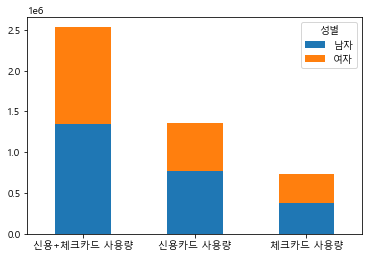

In [134]:
sex_card_spend_2.plot(kind='bar', stacked=True, rot=0)
plt.show()

-----

---------------

----------------------

# 범주화 신용등급 시각화

In [135]:
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
pd.options.display.float_format = '{:.5f}'.format  

df = pd.read_csv("./dataset/credit_card_dataset_city_total.csv")
df

,pop_cd,year,month,avg_score,avg_rat,new_avg_rat,city,ages,monthly_spend_rat,population,...,total_loan_commitment,total_inst_rep_loanb,total_ls_rep_loanb,total_credit_loan,total_mortgage_loan,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend,date
0,L012,2016,1,740,4,5,서울,20대,3,1039000,...,3948200000000,10930280000000,10130250000000,15501880000000,36832550000000,263906000000,86237000000,491447000000,755353000000,2016-01-01
1,L012,2016,2,782,4,5,서울,20대,3,1678000,...,9094760000000,20505160000000,20538720000000,31999460000000,71180760000000,466484000000,139274000000,719862000000,1186346000000,2016-02-01
2,L012,2016,3,782,4,5,서울,20대,3,1679000,...,8982650000000,20618120000000,20769230000000,32220010000000,71323920000000,448293000000,130962000000,747155000000,1195448000000,2016-03-01
3,L012,2016,4,782,4,5,서울,20대,3,1685000,...,9065300000000,20759200000000,21399500000000,32621600000000,72421300000000,492020000000,149965000000,807115000000,1299135000000,2016-04-01
4,L012,2016,5,781,4,5,서울,20대,3,1682000,...,9133260000000,20890440000000,21647340000000,32933560000000,72948340000000,479370000000,137924000000,761946000000,1241316000000,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,L168,2017,8,804,3,3,제주,80대,5,14000,...,186340000000,106820000000,713020000000,279300000000,1529780000000,1148000000,406000000,826000000,1974000000,2017-08-01
2684,L168,2017,9,802,3,3,제주,80대,5,15000,...,197400000000,114600000000,776100000000,304500000000,1653150000000,1110000000,345000000,645000000,1755000000,2017-09-01
2685,L168,2017,10,802,3,3,제주,80대,5,15000,...,217500000000,114450000000,782850000000,308700000000,1687650000000,1230000000,555000000,765000000,1995000000,2017-10-01
2686,L168,2017,11,802,3,3,제주,80대,5,15000,...,220050000000,120300000000,787950000000,307650000000,1705350000000,1110000000,420000000,870000000,1980000000,2017-11-01


In [136]:
rate_pop = df[['new_avg_rat','population']]
rate_pop=rate_pop.groupby('new_avg_rat').sum()
rate_pop = rate_pop.reset_index()
rate_pop.columns=['신용등급','인구수']
rate_pop

,신용등급,인구수
0,1,170905000
1,2,117711000
2,3,320719000
3,4,214900000
4,5,215788000


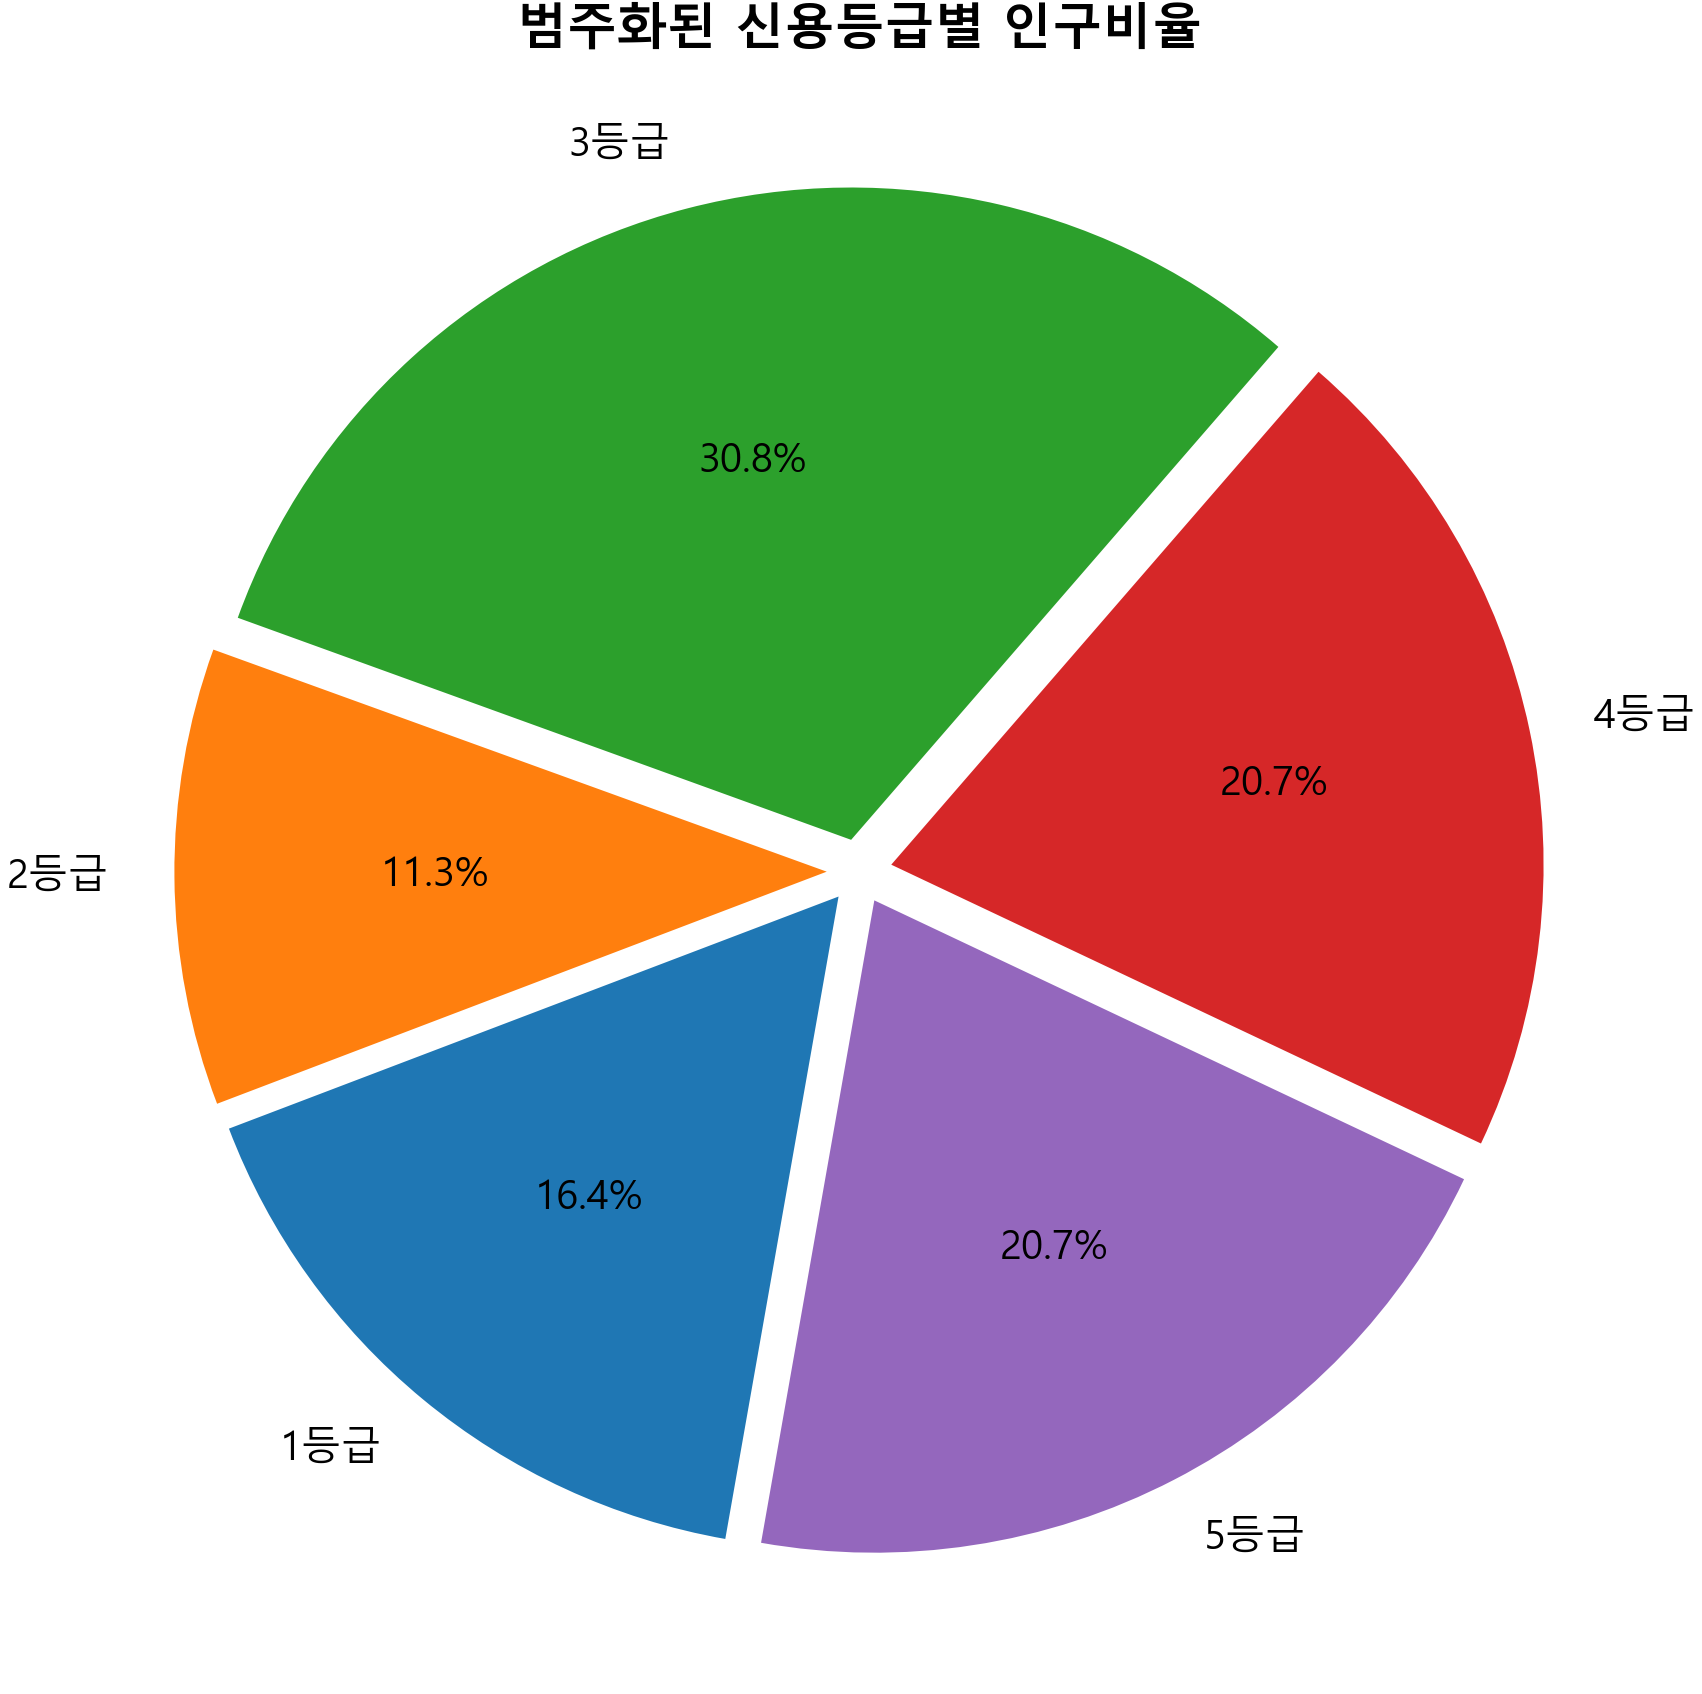

In [137]:
plt.rcParams['font.family'] = 'Malgun Gothic'
ratio = rate_pop['인구수']
labels =['1등급','2등급','3등급','4등급','5등급']
explode = [0.05,0.05,0.05,0.05,0.05]
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
plt.pie(ratio, labels=labels,autopct='%.1f%%',startangle=260,
counterclock=False,explode=explode,textprops={'size':40})
plt.xticks(fontsize=100)

plt.title('범주화된 신용등급별 인구비율',fontsize=50, fontweight= 'bold')
plt.show()

In [178]:
df_2 = df[["city","ages","new_avg_rat","population","total_monthly_loan"]]
df_2

,city,ages,new_avg_rat,population,total_monthly_loan
0,서울,20대,5,1039000,25912660000000
1,서울,20대,5,1678000,51816640000000
2,서울,20대,5,1679000,52049000000000
3,서울,20대,5,1685000,52892150000000
4,서울,20대,5,1682000,53369860000000
...,...,...,...,...,...
2683,제주,80대,3,14000,1008560000000
2684,제주,80대,3,15000,1090650000000
2685,제주,80대,3,15000,1117350000000
2686,제주,80대,3,15000,1130850000000


In [179]:
city_df = df_2.groupby(["city","new_avg_rat"]).sum()
city_df.reset_index(inplace=True)
city_df["monthly_loan"] = city_df['total_monthly_loan'] /city_df['population']
city_df.drop("total_monthly_loan",axis=1, inplace=True)
city_df.drop("population", axis=1, inplace = True)
city_df

,city,new_avg_rat,monthly_loan
0,강원,1,53324472.44094
1,강원,2,60095609.14197
2,강원,3,51800329.67033
3,강원,4,61816111.45463
4,강원,5,40399598.49130
...,...,...,...
72,충북,1,64520440.27193
73,충북,2,59500938.72962
74,충북,3,77525718.16946
75,충북,4,65729763.54223


In [180]:
new_city_df = city_df.pivot(
    index = 'city',
    columns = 'new_avg_rat',
    values='monthly_loan'
)
new_city_df= new_city_df.reset_index()
new_city_df = new_city_df.fillna(0)
new_city_df


new_avg_rat,city,1,2,3,4,5
0,강원,53324472.44094,60095609.14197,51800329.67033,61816111.45463,40399598.49130
1,경기,93803320.83323,92927427.23571,84112171.90614,89086971.71878,39132693.17535
2,경남,78244354.07826,63266403.13238,83490537.63441,72868956.55721,36645683.19798
3,경북,66297054.82042,52340326.57803,77085953.68799,65826070.22685,34675597.14611
4,광주,61713026.02821,55028628.31858,71324677.51274,60791050.00000,32145369.13815
5,대구,74191154.32099,83487495.98593,78344899.06387,77392964.16938,34237450.23208
6,대전,70590316.33535,83466926.58349,70351465.30494,71106718.75000,31216775.50406
7,부산,71027638.01286,65798990.82569,77692069.33911,78441578.09612,33440611.81114
8,서울,93258490.84781,83559784.47042,97544172.11618,38965190.85714,41776859.43719
9,울산,83463848.08013,91733763.09274,80820677.68423,80741898.73418,39423321.26118


In [181]:
city_df.city.unique()
A = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북']

In [182]:
new_city_df_1 = new_city_df.drop("city", axis=1)
new_city_df_1

new_avg_rat,1,2,3,4,5
0,53324472.44094,60095609.14197,51800329.67033,61816111.45463,40399598.49130
1,93803320.83323,92927427.23571,84112171.90614,89086971.71878,39132693.17535
2,78244354.07826,63266403.13238,83490537.63441,72868956.55721,36645683.19798
3,66297054.82042,52340326.57803,77085953.68799,65826070.22685,34675597.14611
4,61713026.02821,55028628.31858,71324677.51274,60791050.00000,32145369.13815
5,74191154.32099,83487495.98593,78344899.06387,77392964.16938,34237450.23208
6,70590316.33535,83466926.58349,70351465.30494,71106718.75000,31216775.50406
7,71027638.01286,65798990.82569,77692069.33911,78441578.09612,33440611.81114
8,93258490.84781,83559784.47042,97544172.11618,38965190.85714,41776859.43719
9,83463848.08013,91733763.09274,80820677.68423,80741898.73418,39423321.26118


In [183]:
#전처리
from sklearn.preprocessing import Normalizer
data = new_city_df_1
scaler = Normalizer()
fitted = scaler.fit(data)
fitted_1=scaler.transform(data)
output = pd.DataFrame(fitted_1, columns=new_city_df_1.columns, index=list(new_city_df_1.index.values))

output


new_avg_rat,1,2,3,4,5
0,0.44144,0.49750,0.42883,0.51174,0.33445
1,0.50889,0.50414,0.45631,0.48330,0.21230
2,0.50773,0.41054,0.54178,0.47285,0.23780
3,0.48595,0.38365,0.56503,0.48250,0.25417
4,0.47823,0.42643,0.55271,0.47108,0.24910
5,0.46212,0.52003,0.48800,0.48207,0.21326
6,0.46617,0.55121,0.46459,0.46958,0.20615
7,0.47162,0.43690,0.51587,0.52084,0.22204
8,0.55282,0.49533,0.57823,0.23098,0.24765
9,0.48199,0.52974,0.46672,0.46627,0.22766


In [184]:
output = output.reset_index(drop=True)
output['도시'] = A
output

new_avg_rat,1,2,3,4,5,도시
0,0.44144,0.49750,0.42883,0.51174,0.33445,강원
1,0.50889,0.50414,0.45631,0.48330,0.21230,경기
2,0.50773,0.41054,0.54178,0.47285,0.23780,경남
3,0.48595,0.38365,0.56503,0.48250,0.25417,경북
4,0.47823,0.42643,0.55271,0.47108,0.24910,광주
5,0.46212,0.52003,0.48800,0.48207,0.21326,대구
6,0.46617,0.55121,0.46459,0.46958,0.20615,대전
7,0.47162,0.43690,0.51587,0.52084,0.22204,부산
8,0.55282,0.49533,0.57823,0.23098,0.24765,서울
9,0.48199,0.52974,0.46672,0.46627,0.22766,울산


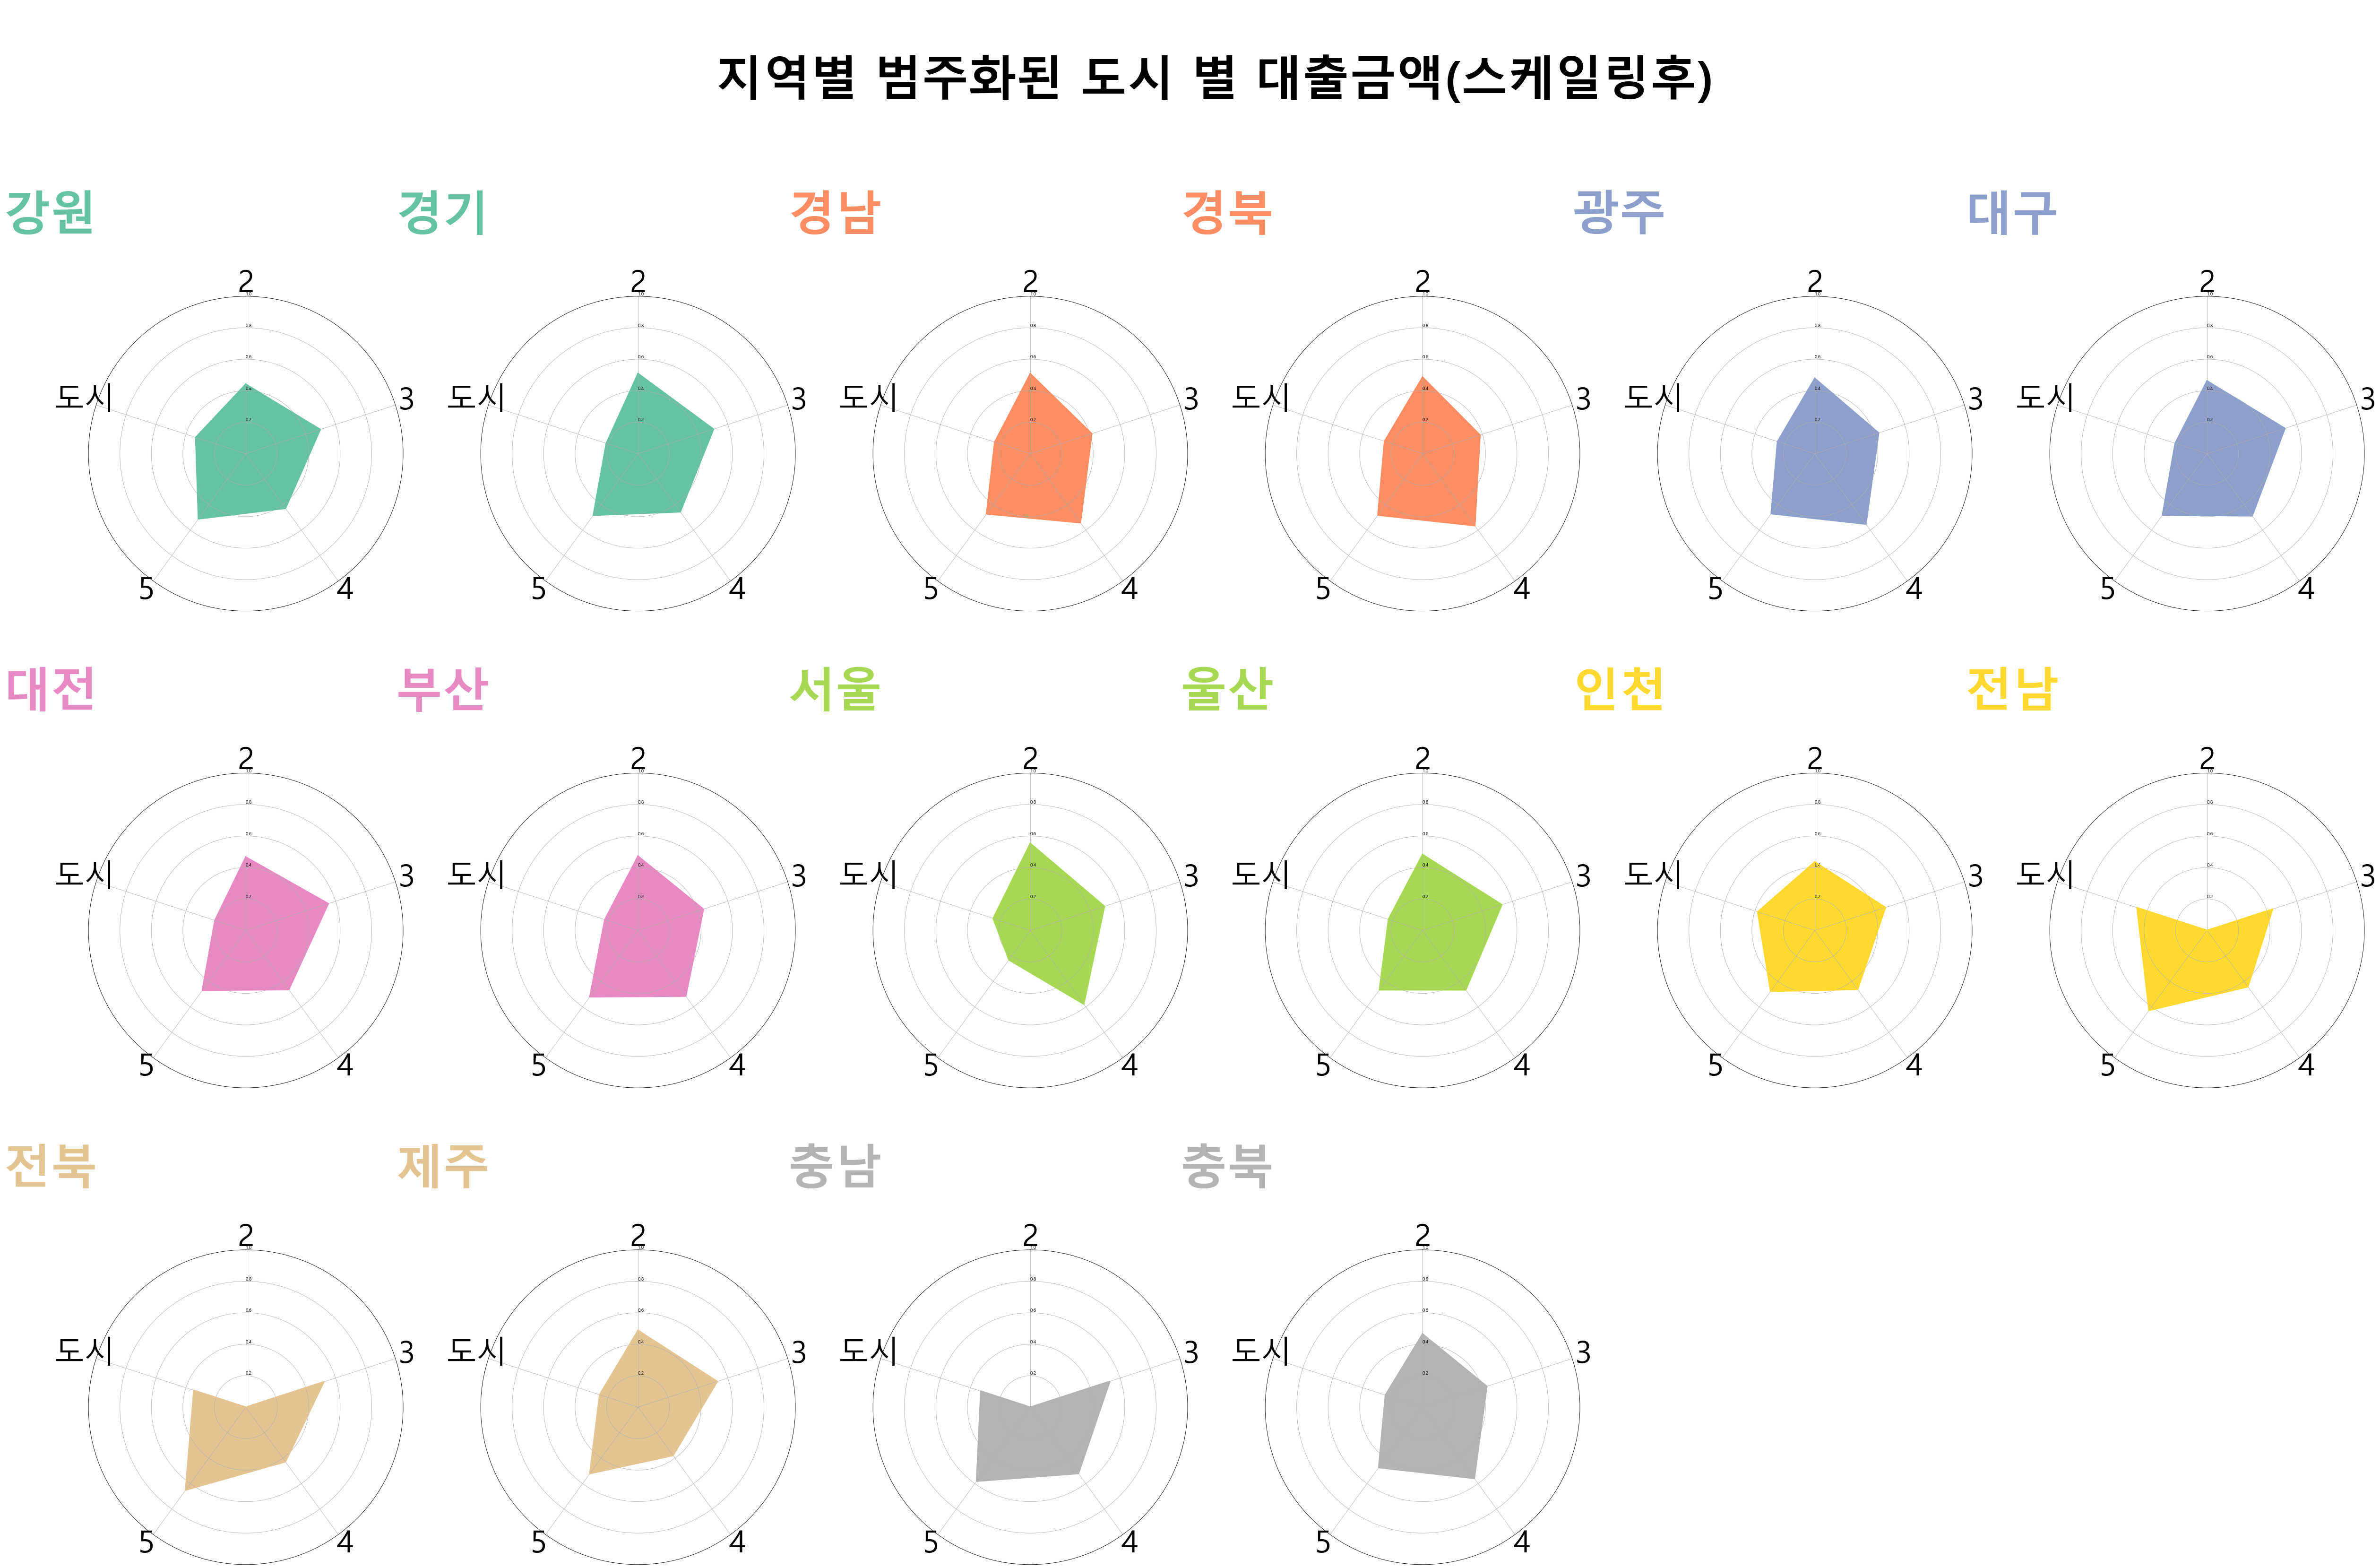

In [185]:
labels = output.columns[1:]
num_labels = len(labels) #라벨의 개수가 몇개인지
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]
my_palette = plt.cm.get_cmap("Set2", len(output.index))


fig = plt.figure(figsize=(70,50))

fig.suptitle("\n지역별 범주화된 도시 별 대출금액(스케일링후)\n", fontsize=100, fontweight='bold')
fig.set_facecolor('white')

for i, row in output.iterrows():
    color = my_palette(i)
    data = output.iloc[i].drop('도시').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,6,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=65) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    # plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6],['0','0.1','0.2','0.3','0.4','0.5','0.6'], fontsize=40) ## y축 눈금 설정
    
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=3, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=1) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.도시, size=100, color=color,x=-0.12, y=1.2,fontweight= 'bold') ## 타이틀은 캐릭터 클래스로 한다.
    

plt.tight_layout(pad=6) ## subplot간 패딩 조절
plt.show()


---------------

---------------------------

----------

# 대출상품별_그룹간_금액분포비교

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format

# 시각화 라이브러리
import matplotlib.pyplot as plt
from pylab import cm

# 한글 폰트 문제
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [152]:
import pandas as pd
clustering = pd.read_csv("./dataset/gmm_clustering.csv")
clustering

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,...,monthly_spend,cluster,city,ages,sex,avg_rat,monthly_loan,credit_card_payment,debit_card_payment,monthly_spend.1
0,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,...,727000,2,서울,20대,NaN,4,24940000,254000,473000,727000
1,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,...,707000,2,서울,20대,NaN,4,30880000,278000,429000,707000
2,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,...,712000,2,서울,20대,NaN,4,31000000,267000,445000,712000
3,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,...,771000,2,서울,20대,NaN,4,31390000,292000,479000,771000
4,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,...,738000,2,서울,20대,NaN,4,31730000,285000,453000,738000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,818,0.18000,200000,58460000,230000,260000,1610000,290000,8600000,18710000,...,157000,0,NaN,80대,여자,3,69610000,82000,75000,157000
3020,818,0.18000,190000,58330000,230000,270000,1610000,310000,8550000,18750000,...,151000,0,NaN,80대,여자,3,69500000,82000,69000,151000
3021,818,0.18000,210000,58190000,240000,290000,1610000,430000,8630000,18760000,...,161000,0,NaN,80대,여자,3,69510000,87000,74000,161000
3022,819,0.18000,200000,58420000,240000,300000,1610000,470000,8570000,18690000,...,156000,0,NaN,80대,여자,3,69750000,80000,76000,156000


In [153]:
bk_loan = clustering[["monthly_bk_loan","cluster"]]
bk_loan

,monthly_bk_loan,cluster
0,18500000,2
1,24150000,2
2,24240000,2
3,24570000,2
4,24830000,2
...,...,...
3019,58460000,0
3020,58330000,0
3021,58190000,0
3022,58420000,0


### 그룹간 은행대출금액 분포 비교

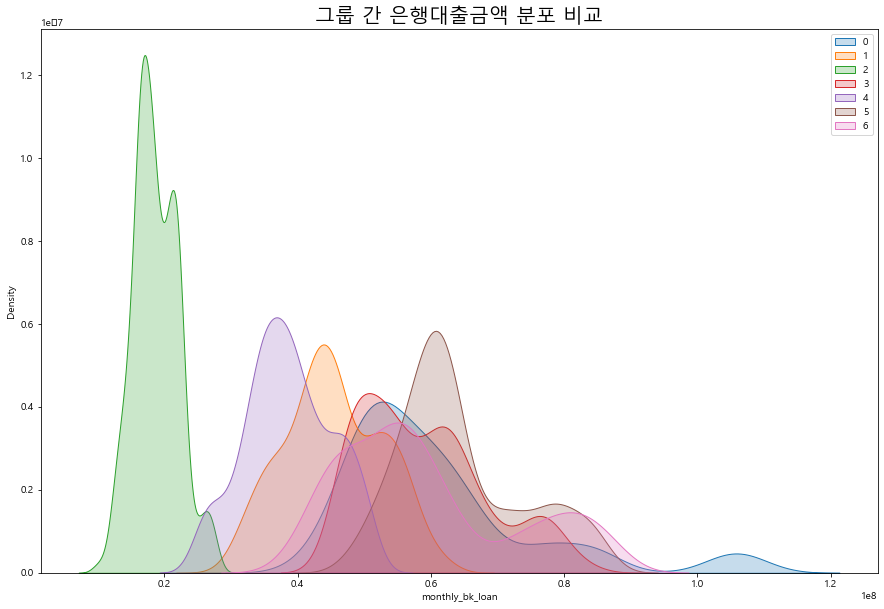

In [154]:
#그룹 간 은행대출금액 분포 비교
plt.figure(figsize=(15,10))
plt.title("그룹 간 은행대출금액 분포 비교", fontsize= 20)
sns.kdeplot(bk_loan[bk_loan["cluster"]==0]['monthly_bk_loan'], shade=True)
sns.kdeplot(bk_loan[bk_loan["cluster"]==1]["monthly_bk_loan"], shade=True)
sns.kdeplot(bk_loan[bk_loan["cluster"]==2]["monthly_bk_loan"], shade=True)
sns.kdeplot(bk_loan[bk_loan["cluster"]==3]["monthly_bk_loan"], shade=True)
sns.kdeplot(bk_loan[bk_loan["cluster"]==4]["monthly_bk_loan"], shade=True)
sns.kdeplot(bk_loan[bk_loan["cluster"]==5]["monthly_bk_loan"], shade=True)
sns.kdeplot(bk_loan[bk_loan["cluster"]==6]["monthly_bk_loan"], shade=True)
plt.legend(['0','1','2','3','4','5','6'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

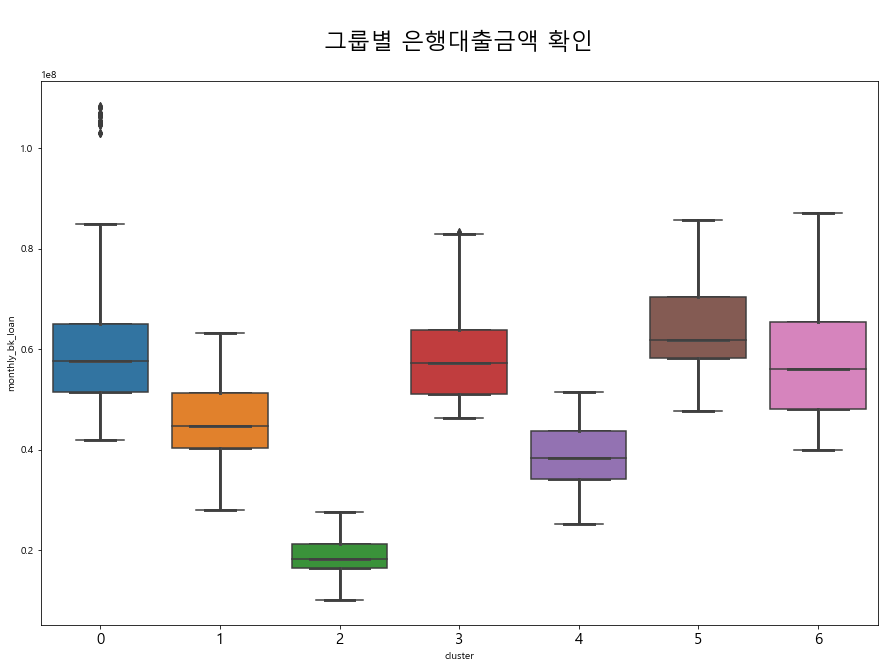

In [155]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cluster', y ='monthly_bk_loan', data=clustering , palette='Spectral', linewidth = 3,width = 0.5) 
plt.title('\n그룹별 은행대출금액 확인\n',fontsize=23)
sns.boxplot(x='cluster', y ='monthly_bk_loan', data=clustering) 
plt.xticks(fontsize=15)

### 그룹간 카드대출금액 분포 비교

In [156]:
#그룹간 

card_loan= clustering[["monthly_cd_loan","cluster"]]
card_loan

,monthly_cd_loan,cluster
0,620000,2
1,680000,2
2,680000,2
3,680000,2
4,700000,2
...,...,...
3019,230000,0
3020,230000,0
3021,240000,0
3022,240000,0


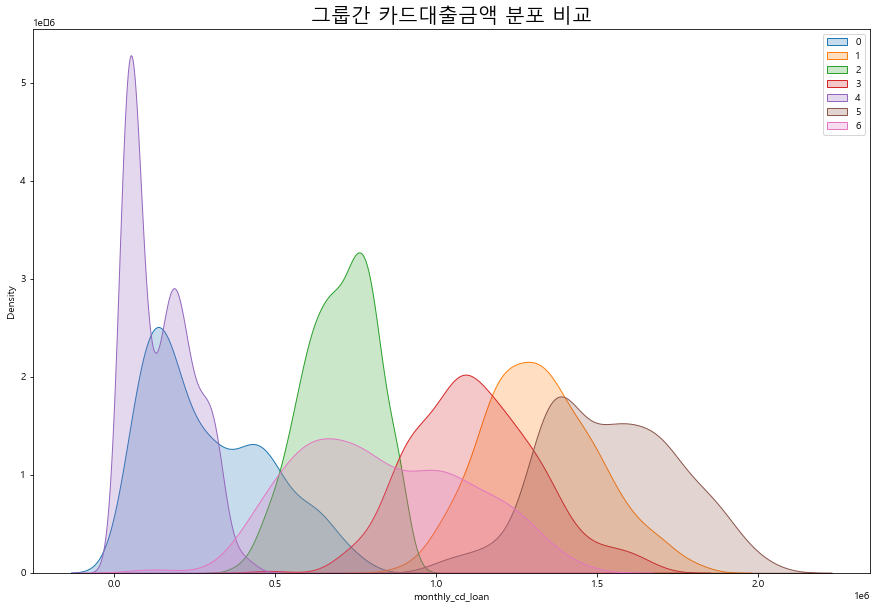

In [157]:
plt.figure(figsize=(15,10))
plt.title("그룹간 카드대출금액 분포 비교", fontsize= 20)
sns.kdeplot(card_loan[card_loan["cluster"]==0]['monthly_cd_loan'], shade=True)
sns.kdeplot(card_loan[card_loan["cluster"]==1]["monthly_cd_loan"], shade=True)
sns.kdeplot(card_loan[card_loan["cluster"]==2]["monthly_cd_loan"], shade=True)
sns.kdeplot(card_loan[card_loan["cluster"]==3]["monthly_cd_loan"], shade=True)
sns.kdeplot(card_loan[card_loan["cluster"]==4]["monthly_cd_loan"], shade=True)
sns.kdeplot(card_loan[card_loan["cluster"]==5]["monthly_cd_loan"], shade=True)
sns.kdeplot(card_loan[card_loan["cluster"]==6]["monthly_cd_loan"], shade=True)
plt.legend(['0','1','2','3','4','5','6'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

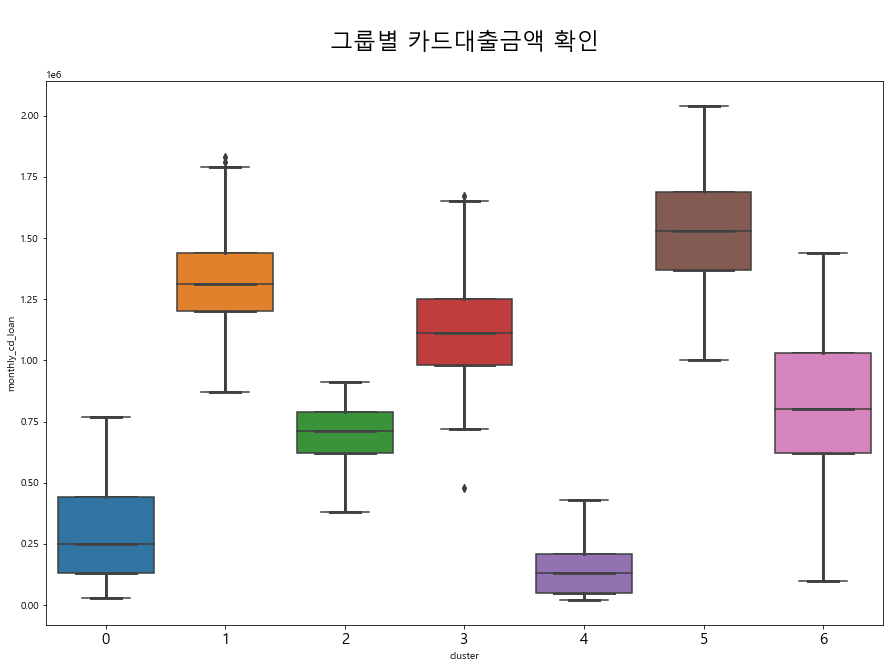

In [158]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cluster', y ='monthly_cd_loan', data=clustering , palette='Spectral', linewidth = 3,width = 0.5) 
plt.title('\n그룹별 카드대출금액 확인\n',fontsize=23)
sns.boxplot(x='cluster', y ='monthly_cd_loan', data=clustering) 
plt.xticks(fontsize=15)

### 그룹간 캐피탈 대출금액 분포 비교

In [159]:
capital = clustering[["monthly_installments_loan","cluster"]]
capital

,monthly_installments_loan,cluster
0,2110000,2
1,2300000,2
2,2300000,2
3,2300000,2
4,2320000,2
...,...,...
3019,260000,0
3020,270000,0
3021,290000,0
3022,300000,0


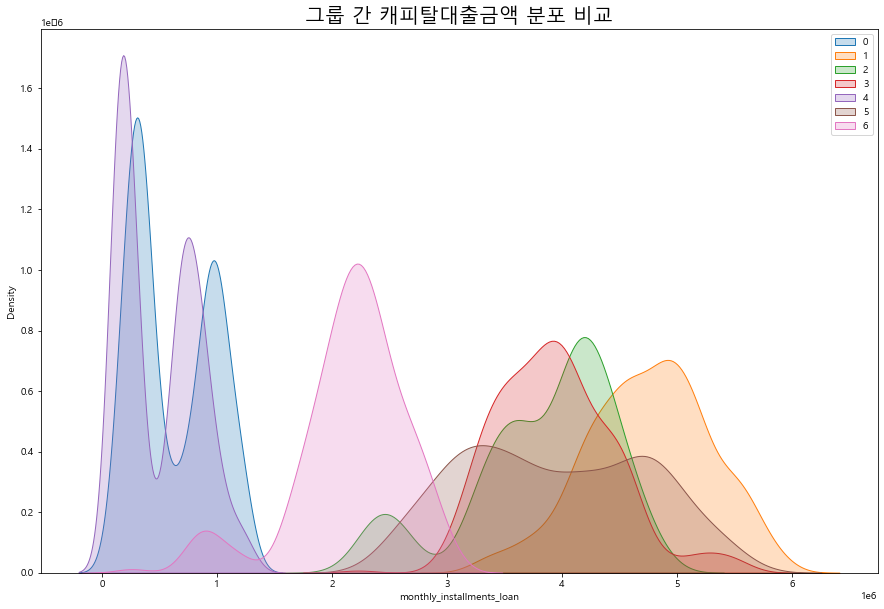

In [160]:
plt.figure(figsize=(15,10))
plt.title("그룹 간 캐피탈대출금액 분포 비교", fontsize= 20)
sns.kdeplot(capital[capital["cluster"]==0]['monthly_installments_loan'], shade=True)
sns.kdeplot(capital[capital["cluster"]==1]["monthly_installments_loan"], shade=True)
sns.kdeplot(capital[capital["cluster"]==2]["monthly_installments_loan"], shade=True)
sns.kdeplot(capital[capital["cluster"]==3]["monthly_installments_loan"], shade=True)
sns.kdeplot(capital[capital["cluster"]==4]["monthly_installments_loan"], shade=True)
sns.kdeplot(capital[capital["cluster"]==5]["monthly_installments_loan"], shade=True)
sns.kdeplot(capital[capital["cluster"]==6]["monthly_installments_loan"], shade=True)
plt.legend(['0','1','2','3','4','5','6'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

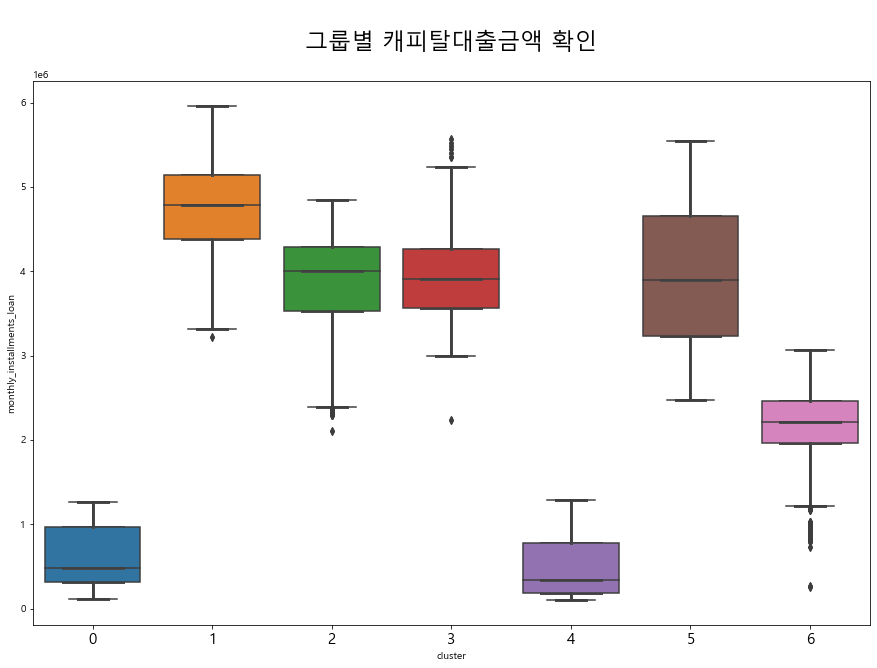

In [161]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cluster', y ='monthly_installments_loan', data=clustering , palette='Spectral', linewidth = 3,width = 0.5) 
plt.title('\n그룹별 캐피탈대출금액 확인\n',fontsize=23)
sns.boxplot(x='cluster', y ='monthly_installments_loan', data=clustering) 
plt.xticks(fontsize=15)

### 그룹 간 보험엄종대출금액 분포 비교

In [162]:
insurance_loan= clustering[["monthly_insurance_loan","cluster"]]
insurance_loan

,monthly_insurance_loan,cluster
0,680000,2
1,790000,2
2,790000,2
3,790000,2
4,770000,2
...,...,...
3019,1610000,0
3020,1610000,0
3021,1610000,0
3022,1610000,0


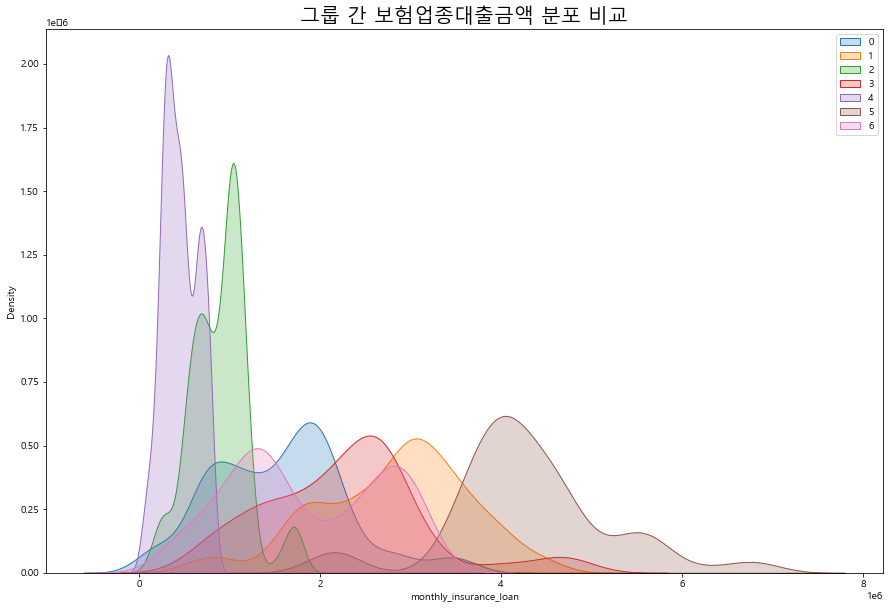

In [163]:
plt.figure(figsize=(15,10))
plt.title("그룹 간 보험업종대출금액 분포 비교", fontsize= 20)
sns.kdeplot(insurance_loan[insurance_loan["cluster"]==0]['monthly_insurance_loan'], shade=True)
sns.kdeplot(insurance_loan[insurance_loan["cluster"]==1]["monthly_insurance_loan"], shade=True)
sns.kdeplot(insurance_loan[insurance_loan["cluster"]==2]["monthly_insurance_loan"], shade=True)
sns.kdeplot(insurance_loan[insurance_loan["cluster"]==3]["monthly_insurance_loan"], shade=True)
sns.kdeplot(insurance_loan[insurance_loan["cluster"]==4]["monthly_insurance_loan"], shade=True)
sns.kdeplot(insurance_loan[insurance_loan["cluster"]==5]["monthly_insurance_loan"], shade=True)
sns.kdeplot(insurance_loan[insurance_loan["cluster"]==6]["monthly_insurance_loan"], shade=True)
plt.legend(['0','1','2','3','4','5','6'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

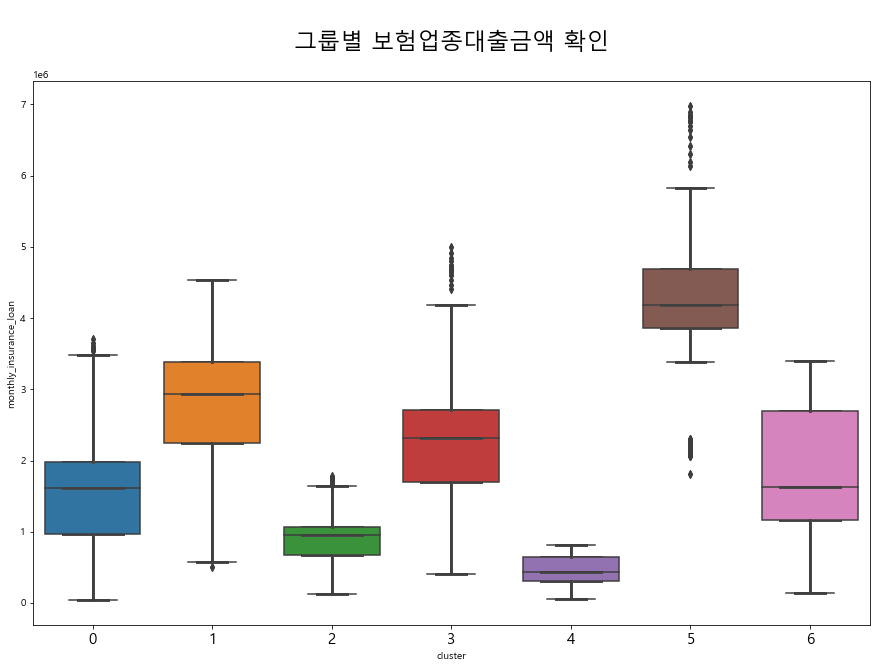

In [164]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cluster', y ='monthly_insurance_loan', data=clustering , palette='Spectral', linewidth = 3,width = 0.5) 
plt.title('\n그룹별 보험업종대출금액 확인\n',fontsize=23)
sns.boxplot(x='cluster', y ='monthly_insurance_loan', data=clustering) 
plt.xticks(fontsize=15)

### 그룹 간 저축은행대출금액 분포 비교

In [165]:
sbk_loan = clustering[["monthly_sbk_loan","cluster"]]
sbk_loan

,monthly_sbk_loan,cluster
0,1320000,2
1,1160000,2
2,1210000,2
3,1230000,2
4,1250000,2
...,...,...
3019,290000,0
3020,310000,0
3021,430000,0
3022,470000,0


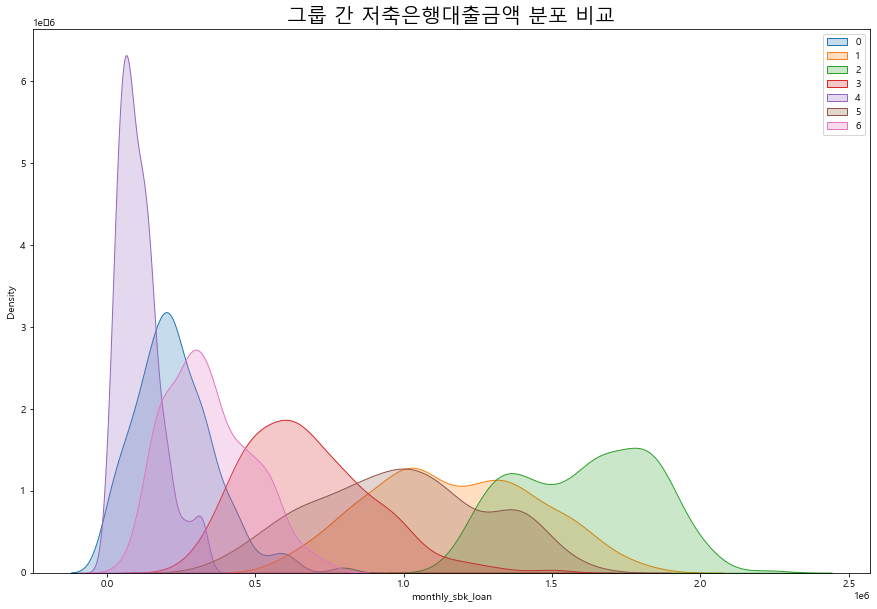

In [166]:
plt.figure(figsize=(15,10))
plt.title("그룹 간 저축은행대출금액 분포 비교", fontsize= 20)
sns.kdeplot(sbk_loan[sbk_loan["cluster"]==0]['monthly_sbk_loan'], shade=True)
sns.kdeplot(sbk_loan[sbk_loan["cluster"]==1]["monthly_sbk_loan"], shade=True)
sns.kdeplot(sbk_loan[sbk_loan["cluster"]==2]["monthly_sbk_loan"], shade=True)
sns.kdeplot(sbk_loan[sbk_loan["cluster"]==3]["monthly_sbk_loan"], shade=True)
sns.kdeplot(sbk_loan[sbk_loan["cluster"]==4]["monthly_sbk_loan"], shade=True)
sns.kdeplot(sbk_loan[sbk_loan["cluster"]==5]["monthly_sbk_loan"], shade=True)
sns.kdeplot(sbk_loan[sbk_loan["cluster"]==6]["monthly_sbk_loan"], shade=True)
plt.legend(['0','1','2','3','4','5','6'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

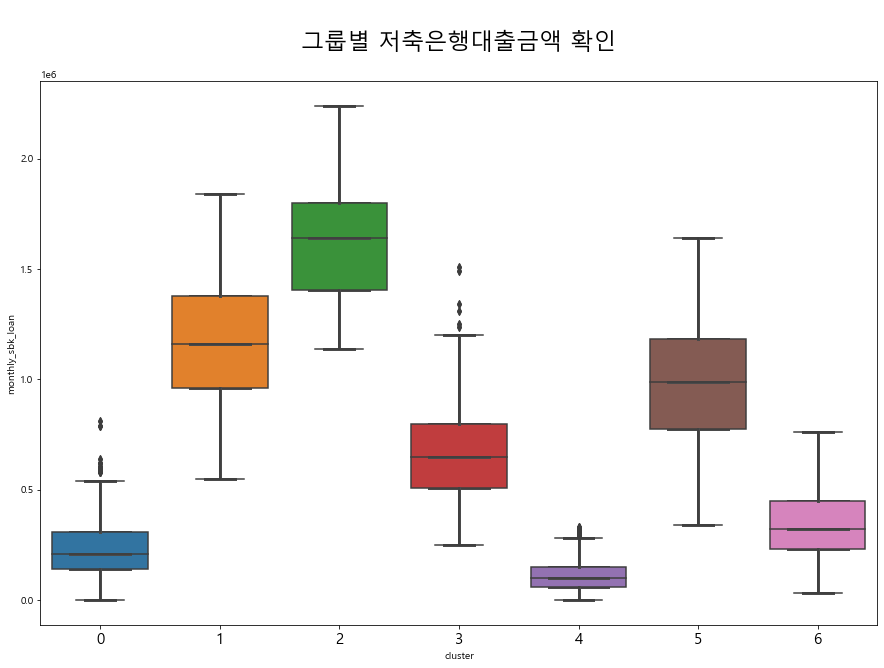

In [167]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cluster', y ='monthly_sbk_loan', data=clustering , palette='Spectral', linewidth = 3,width = 0.5) 
plt.title('\n그룹별 저축은행대출금액 확인\n',fontsize=23)
sns.boxplot(x='cluster', y ='monthly_sbk_loan', data=clustering) 
plt.xticks(fontsize=15)

### 그룹간 신용대출금액 분포 비교

In [168]:
credit_loan = clustering[["credit_loan","cluster"]]
credit_loan

,credit_loan,cluster
0,14920000,2
1,19070000,2
2,19190000,2
3,19360000,2
4,19580000,2
...,...,...
3019,14140000,0
3020,14230000,0
3021,14250000,0
3022,14330000,0


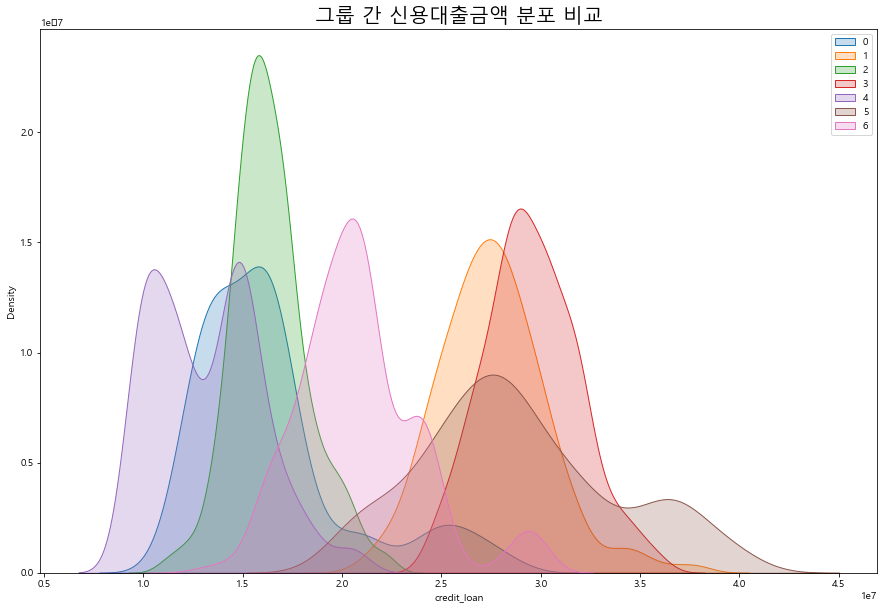

In [169]:
plt.figure(figsize=(15,10))
plt.title("그룹 간 신용대출금액 분포 비교", fontsize= 20)
sns.kdeplot(credit_loan[credit_loan["cluster"]==0]['credit_loan'], shade=True)
sns.kdeplot(credit_loan[credit_loan["cluster"]==1]["credit_loan"], shade=True)
sns.kdeplot(credit_loan[credit_loan["cluster"]==2]["credit_loan"], shade=True)
sns.kdeplot(credit_loan[credit_loan["cluster"]==3]["credit_loan"], shade=True)
sns.kdeplot(credit_loan[credit_loan["cluster"]==4]["credit_loan"], shade=True)
sns.kdeplot(credit_loan[credit_loan["cluster"]==5]["credit_loan"], shade=True)
sns.kdeplot(credit_loan[credit_loan["cluster"]==6]["credit_loan"], shade=True)
plt.legend(['0','1','2','3','4','5','6'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

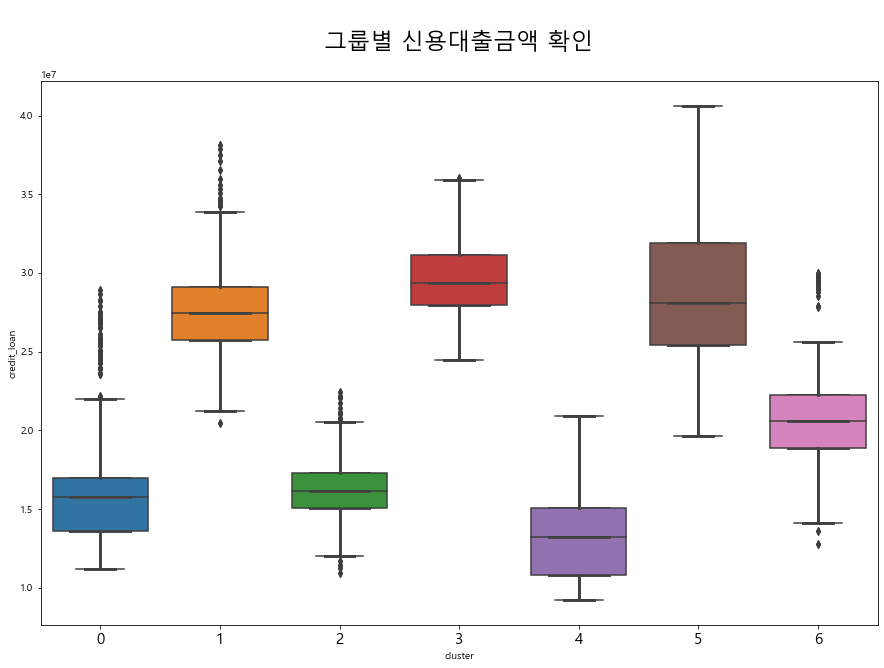

In [170]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cluster', y ='credit_loan', data=clustering , palette='Spectral', linewidth = 3,width = 0.5) 
plt.title('\n그룹별 신용대출금액 확인\n',fontsize=23)
sns.boxplot(x='cluster', y ='credit_loan', data=clustering) 
plt.xticks(fontsize=15)

### 그룹 간 담보대출금액 분포 비교

In [171]:
mortgage_loan = clustering[["mortgage_loan","cluster"]]
mortgage_loan

,mortgage_loan,cluster
0,35450000,2
1,42420000,2
2,42480000,2
3,42980000,2
4,43370000,2
...,...,...
3019,84270000,0
3020,84120000,0
3021,84200000,0
3022,84390000,0


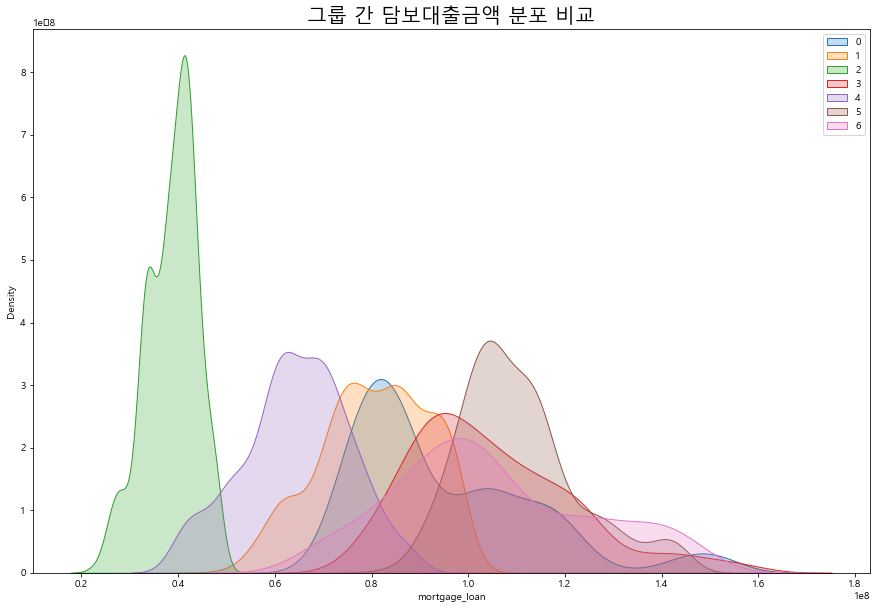

In [172]:
plt.figure(figsize=(15,10))
plt.title("그룹 간 담보대출금액 분포 비교", fontsize= 20)
sns.kdeplot(mortgage_loan[mortgage_loan["cluster"]==0]['mortgage_loan'], shade=True)
sns.kdeplot(mortgage_loan[mortgage_loan["cluster"]==1]["mortgage_loan"], shade=True)
sns.kdeplot(mortgage_loan[mortgage_loan["cluster"]==2]["mortgage_loan"], shade=True)
sns.kdeplot(mortgage_loan[mortgage_loan["cluster"]==3]["mortgage_loan"], shade=True)
sns.kdeplot(mortgage_loan[mortgage_loan["cluster"]==4]["mortgage_loan"], shade=True)
sns.kdeplot(mortgage_loan[mortgage_loan["cluster"]==5]["mortgage_loan"], shade=True)
sns.kdeplot(mortgage_loan[mortgage_loan["cluster"]==6]["mortgage_loan"], shade=True)
plt.legend(['0','1','2','3','4','5','6'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

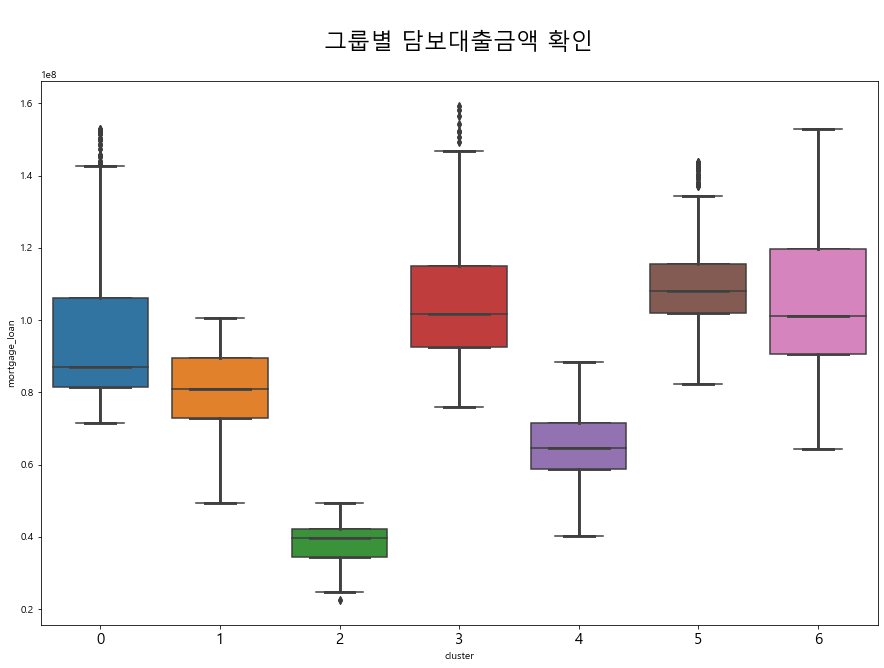

In [173]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cluster', y ='mortgage_loan', data=clustering , palette='Spectral', linewidth = 3,width = 0.5) 
plt.title('\n그룹별 담보대출금액 확인\n',fontsize=23)
sns.boxplot(x='cluster', y ='mortgage_loan', data=clustering) 
plt.xticks(fontsize=15)

-------------

----------------

------------------

## 카드사용금액 비교

In [174]:
monthly_card_spend = clustering[['monthly_card_spend',"cluster"]]
monthly_card_spend

,monthly_card_spend,cluster
0,810000,2
1,790000,2
2,790000,2
3,860000,2
4,820000,2
...,...,...
3019,200000,0
3020,190000,0
3021,210000,0
3022,200000,0


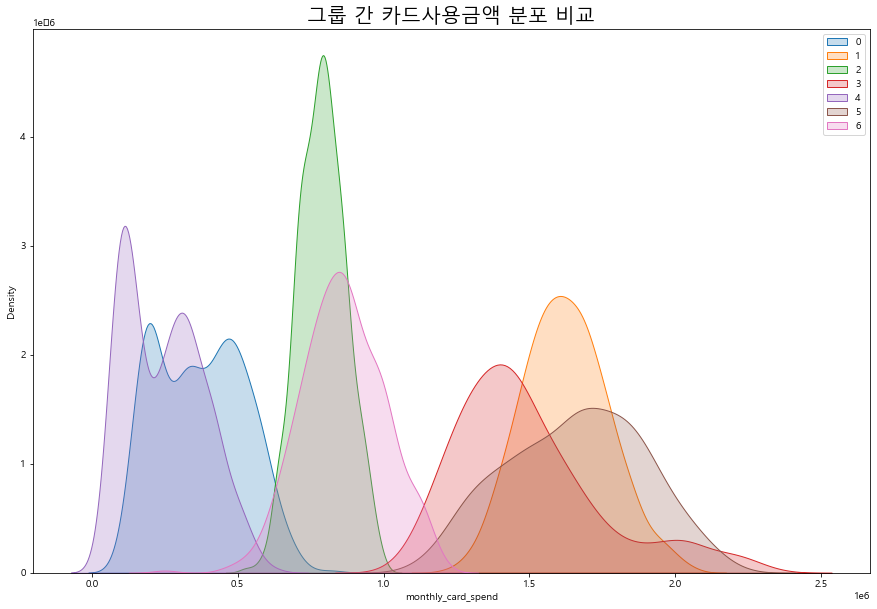

In [175]:
plt.figure(figsize=(15,10))
plt.title("그룹 간 카드사용금액 분포 비교", fontsize= 20)
sns.kdeplot(monthly_card_spend[monthly_card_spend["cluster"]==0]['monthly_card_spend'], shade=True)
sns.kdeplot(monthly_card_spend[monthly_card_spend["cluster"]==1]["monthly_card_spend"], shade=True)
sns.kdeplot(monthly_card_spend[monthly_card_spend["cluster"]==2]["monthly_card_spend"], shade=True)
sns.kdeplot(monthly_card_spend[monthly_card_spend["cluster"]==3]["monthly_card_spend"], shade=True)
sns.kdeplot(monthly_card_spend[monthly_card_spend["cluster"]==4]["monthly_card_spend"], shade=True)
sns.kdeplot(monthly_card_spend[monthly_card_spend["cluster"]==5]["monthly_card_spend"], shade=True)
sns.kdeplot(monthly_card_spend[monthly_card_spend["cluster"]==6]["monthly_card_spend"], shade=True)
plt.legend(['0','1','2','3','4','5','6'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

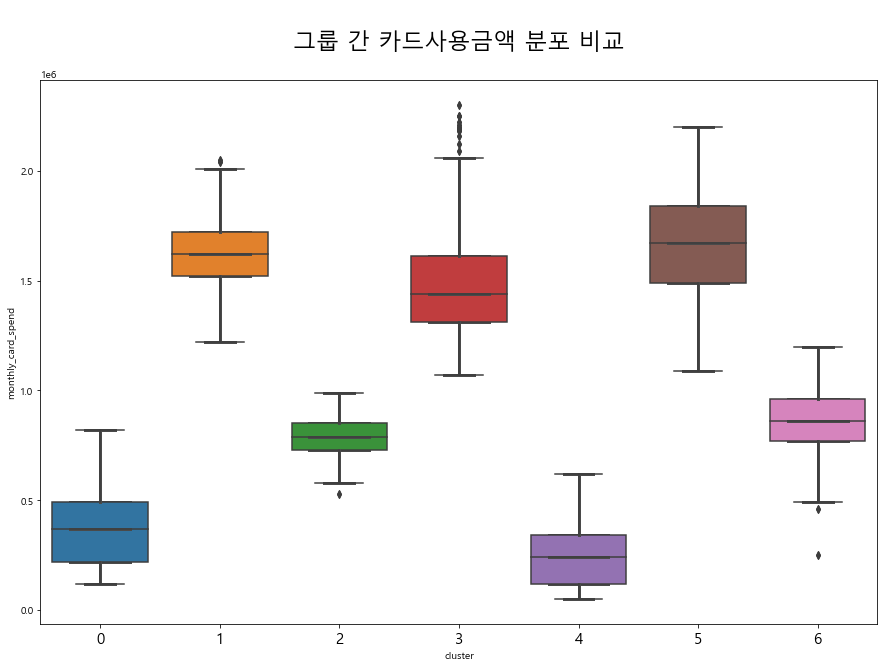

In [176]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cluster', y ='monthly_card_spend', data=clustering , palette='Spectral', linewidth = 3,width = 0.5) 
plt.title('\n그룹 간 카드사용금액 분포 비교\n',fontsize=23)
sns.boxplot(x='cluster', y ='monthly_card_spend', data=clustering) 
plt.xticks(fontsize=15)